# Projeto final de Introdução ao Aprendizado de Máquina
## Localização *indoor* utilizando técnicas de classificação e regressão

Elço João dos Santos Junior<br>
Rodrigo Kobashikawa Rosa

# Conjunto de dados: iBeacon RSSI

### Exploração dos dados

Importação das bibliotecas utilizadas durante o projeto.

In [1]:
# Bibliotecas de uso geral
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas import DataFrame
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Blibiotecas de classificadores e Grid Search
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor

# Bibliotecas de regrassão linear e cálculo de métricas
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Importando o *dataset* para a variação **df**.

In [2]:
df = pd.read_csv('data/ble-rssi-dataset/iBeacon_RSSI_Labeled.csv')

Imagem com representação do ambiente no qual as medidas foram realizadas. O pontos em verde indicam a posição dos *beacons*, totalizando 13 dispositivos que foram utilizados para transmitir dados periódicos. Com um outro dispositivo, como por exemplo um *smartphone*, leu-se os valores de potência (RSSI) de cada *beacon* em cada um dos quadrados da imagem (por exemplo, posição O2, P3, Q5 etc). Para os *beacons* que não eram lidos em determinada posição devido a fatores como distância, o valor de -200 foi atribuído.

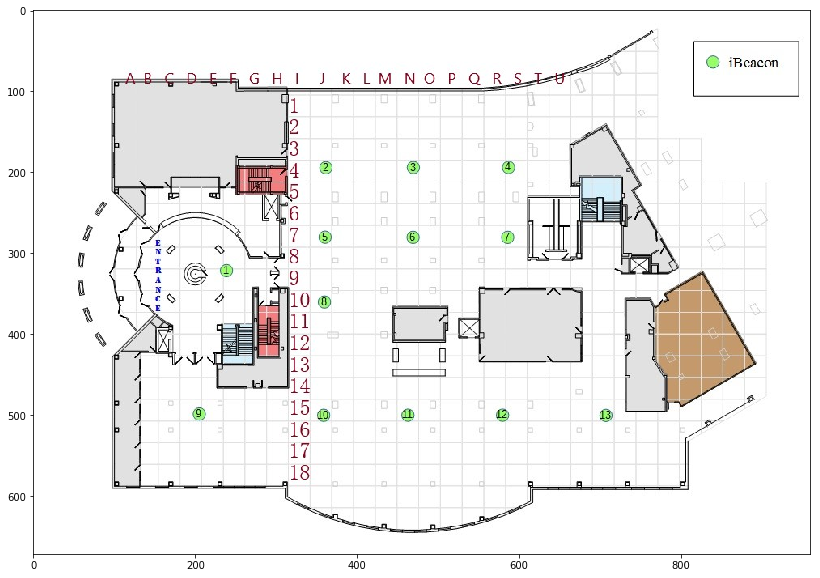

In [3]:
img = mpimg.imread('data/ble-rssi-dataset/iBeacon_Layout.jpg')
plt.figure(figsize=(14,10))
imgplot = plt.imshow(img)

*Dataset* resultante das medidas realizadas.

In [4]:
df.head(8)

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
5,P01,10-18-2016 11:15:11,-200,-200,-82,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
6,P01,10-18-2016 11:15:09,-200,-200,-80,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
7,P02,10-18-2016 11:15:07,-200,-200,-86,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


Um toral de 105 posições foram mapeadas.

In [5]:
locations = df.location.unique()
locations.sort()
locations

array(['D13', 'D14', 'D15', 'E15', 'F08', 'G15', 'I01', 'I02', 'I03',
       'I04', 'I05', 'I06', 'I07', 'I08', 'I09', 'I10', 'I15', 'J01',
       'J02', 'J03', 'J04', 'J05', 'J06', 'J07', 'J08', 'J10', 'J15',
       'K01', 'K02', 'K03', 'K04', 'K05', 'K06', 'K07', 'K08', 'L01',
       'L02', 'L03', 'L04', 'L05', 'L06', 'L08', 'L09', 'L15', 'M01',
       'M02', 'M03', 'M04', 'M05', 'M06', 'N01', 'N02', 'N03', 'N04',
       'N05', 'N06', 'N15', 'O01', 'O02', 'O03', 'O04', 'O05', 'O06',
       'P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P15', 'Q01', 'Q02',
       'Q03', 'Q04', 'Q05', 'Q06', 'R01', 'R02', 'R03', 'R04', 'R05',
       'R06', 'R15', 'S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07',
       'S08', 'S15', 'T01', 'T03', 'T04', 'T05', 'T15', 'U01', 'U02',
       'U03', 'U04', 'U05', 'U15', 'V15', 'W15'], dtype=object)

Foram obtidas no total 1420 medidas.

In [6]:
df.describe()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
mean,-197.825352,-156.623944,-175.533099,-164.534507,-178.378169,-175.063380,-195.637324,-191.970423,-197.145070,-197.442254,-197.748592,-197.233803,-196.065493
std,16.259105,60.217747,49.452958,56.523261,47.175799,49.596627,22.880980,30.733742,19.160207,17.741632,16.852535,18.541088,22.053924
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
50%,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
75%,-200.000000,-78.000000,-200.000000,-80.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
max,-67.000000,-59.000000,-56.000000,-56.000000,-60.000000,-62.000000,-58.000000,-56.000000,-55.000000,-61.000000,-59.000000,-60.000000,-59.000000


### Definição das funções utilizadas durante os processamentos

Função para comparação dos métodos de classificação.

In [7]:
def compare_classification_methods(X_train, X_test, y_train, y_test):
    # SVM
    gamma = 1
    model = SVC(C=1, kernel='rbf', gamma = gamma)
    model.fit(X_train, y_train)
    print('Accuracy SVM:', model.score(X_test, y_test))
    
    # SVM grid search
    params = {'C': [0.001, 0.01, 0.1, 1, 10], 
          'kernel': ['rbf'],
          'gamma': [0.001, 0.01, 0.1, 1]}

    svm = SVC()
    grid_search_svm = GridSearchCV(estimator=svm, param_grid=params, verbose=0)
    grid_search_svm.fit(X_train, y_train)
    
    best_grid = grid_search_svm.best_estimator_
    grid_accuracy = best_grid.score(X_test, y_test)
    print('Accuracy SVM grid search:', grid_accuracy, "--> params selected: ", grid_search_svm.best_params_)
    
    # Random forest
    model = RandomForestClassifier(n_estimators=20, max_depth=9)
    model.fit(X_train, y_train)
    print('Accuracy Random Forest:', model.score(X_test, y_test))
    
    # Random forest grid search
    param_grid_rf = {'n_estimators': [5,10,15,20,25,40],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [5,7,10,20,30,60],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
    
    rf = RandomForestClassifier()
    grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, verbose=0)

    grid_search_rf.fit(X_train, y_train)    
    best_grid_rf = grid_search_rf.best_estimator_
    grid_accuracy_rf = best_grid_rf.score(X_test, y_test)
    print('Accuracy Random forest grid search:', grid_accuracy_rf, "--> params selected: ", grid_search_rf.best_params_)
    
    # k-NN
    model = KNeighborsClassifier(n_neighbors=15)
    model.fit(X_train, y_train)
    print('Accuracy k-NN:', model.score(X_test, y_test))

    
    # k-NN grid search
    params_knn = {'n_neighbors':[5,10,15,20,25,35,50],
                  'leaf_size':[1,3,5,7,9,12],
                  'weights':['uniform', 'distance'],
                  'algorithm':['auto','ball_tree','kd_tree','brute']}

    knn = KNeighborsClassifier()
    grid_search_knn = GridSearchCV(estimator=knn, param_grid=params_knn, verbose=0)
    grid_search_knn.fit(X_train, y_train)
    
    best_grid_knn = grid_search_knn.best_estimator_
    grid_accuracy_knn = best_grid_knn.score(X_test, y_test)
    print('Accuracy k-NN grid search:', grid_accuracy_knn, "--> params selected: ", grid_search_knn.best_params_)

Função para normalização dos dados, deixando-os em um intervalo de 0 a 1.

In [8]:
def normalize(X):
    return (X - min(X.min())) / (max(X.max()) - min(X.min()))

### Classificação utilizando o *dataset* original

Separação entre atributos e rótulos, e criação dos conjuntos de treinamento (70%) e teste (30%).

In [9]:
X = df.loc[:, 'b3001':'b3013']
y = df.location

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Comparação entre os métodos de classificação.

In [10]:
compare_classification_methods(X_train, X_test, y_train, y_test)

Accuracy SVM: 0.17136150234741784
Accuracy SVM grid search: 0.2934272300469484 --> params selected:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy Random Forest: 0.25586854460093894
Accuracy Random forest grid search: 0.2934272300469484 --> params selected:  {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}
Accuracy k-NN: 0.2136150234741784
Accuracy k-NN grid search: 0.2746478873239437 --> params selected:  {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}


**Análise**

Este teste inicial mostra resultados não tão satisfatórios, com uma acurácia máxima de 29% utilizando SVM com gamma = 0.01 e C = 10.

### Classificação utilizando o *dataset* alterado [parte 1]

Nesta primeira etapa, separou-se a localização em dois eixos, representados pela letra e número de cada posição.

In [11]:
df2 = df.copy()

Separação entre coordenadas X e Y.

In [12]:
df2['col_loc'] = df['location'].str[0]
df2['row_loc'] = df['location'].str[1:]

In [13]:
df2.head(8)

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013,col_loc,row_loc
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200,O,02
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200,P,01
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200,P,01
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200,P,01
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200,P,01
5,P01,10-18-2016 11:15:11,-200,-200,-82,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,P,01
6,P01,10-18-2016 11:15:09,-200,-200,-80,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200,P,01
7,P02,10-18-2016 11:15:07,-200,-200,-86,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,P,02


Criação de dois *dataframes* secundários, um apenas com a coordenada X e outro com a coordenada Y.

In [14]:
df2_x = DataFrame(df2.loc[:, 'b3001':'col_loc']) # dataframe com coordenada X
df2_y = DataFrame(df2.loc[:, 'b3001':'b3013']) # dataframe com coordenada Y
df2_y['row_loc'] = df2.loc[:, 'row_loc']

In [15]:
# comparação dos métodos para o eixo X
X_1 = df2_x.loc[:, 'b3001':'b3013']
y_1 = df2_x.loc[:, 'col_loc']

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

compare_classification_methods(X_train, X_test, y_train, y_test)

Accuracy SVM: 0.33098591549295775
Accuracy SVM grid search: 0.43661971830985913 --> params selected:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy Random Forest: 0.43896713615023475
Accuracy Random forest grid search: 0.42488262910798125 --> params selected:  {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 40}
Accuracy k-NN: 0.4014084507042254
Accuracy k-NN grid search: 0.4225352112676056 --> params selected:  {'algorithm': 'auto', 'leaf_size': 7, 'n_neighbors': 5, 'weights': 'distance'}


In [16]:
# comparação dos métodos para o eixo Y
X_2 = df2_y.loc[:, 'b3001':'b3013']
y_2 = df2_y.loc[:, 'row_loc']

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3, random_state=0)
compare_classification_methods(X_train, X_test, y_train, y_test)

Accuracy SVM: 0.4061032863849765
Accuracy SVM grid search: 0.5187793427230047 --> params selected:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy Random Forest: 0.4647887323943662
Accuracy Random forest grid search: 0.4647887323943662 --> params selected:  {'bootstrap': True, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}
Accuracy k-NN: 0.4460093896713615
Accuracy k-NN grid search: 0.47183098591549294 --> params selected:  {'algorithm': 'auto', 'leaf_size': 3, 'n_neighbors': 20, 'weights': 'uniform'}


**Análise**

Ao utilizar a técnica de separar a região em eixos, obteve-se um aumento da acurácia de predisão, como esperado. Para o eixo X, temos 44.6% usando Random Forest e para o eixo Y temos 51.9% usando SVM. Apesar de a acurácia ter aumentado, é preciso que ambos modelos acertem para que a posição seja acertada de fato.

### Classificação utilizando o *dataset* alterado [parte 2]

Nesta etapa, os algoritmos de classificação serão testados novamente, porém, aumentando a dimensão de cada posição do ambiente *indoor*, com o intuito de aumentar a acurácia visto que cada região terá mais medidas de RSSI.

**Dobrando a área de cada posição**

In [17]:
df3 = df.copy()

In [18]:
df3.head(8)

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
5,P01,10-18-2016 11:15:11,-200,-200,-82,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
6,P01,10-18-2016 11:15:09,-200,-200,-80,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
7,P02,10-18-2016 11:15:07,-200,-200,-86,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


Procedimento para dobrar o tamanho de cada região em um dos eixos considerando apenas as regiões nas quais foram feitas medidas. A região 2 passa a integrar a 1, a 4 passa a integrar a 3, e assim por diante.

In [19]:
df3['location'] = df3['location'].str.replace('02','01')
df3['location'] = df3['location'].str.replace('04','03')
df3['location'] = df3['location'].str.replace('06','05')
df3['location'] = df3['location'].str.replace('08','07')
df3['location'] = df3['location'].str.replace('10','09')
df3['location'] = df3['location'].str.replace('14','13')

Não observa-se mais as regiões 2, 4 etc, como esperado.

In [20]:
new_locations = df3['location'].str[1:].unique()
new_locations.sort()
new_locations

array(['01', '03', '05', '07', '09', '13', '15'], dtype=object)

Procedimento para dobrar o tamanho de cada região em um dos eixos considerando apenas as regiões nas quais foram feitas medidas. A região E passa a integrar a D, a G passa a integrar a F, e assim por diante.

In [21]:
df3['location'] = df3['location'].str.replace('E','D')
df3['location'] = df3['location'].str.replace('G','F')
df3['location'] = df3['location'].str.replace('J','I')
df3['location'] = df3['location'].str.replace('L','K')
df3['location'] = df3['location'].str.replace('N','M')
df3['location'] = df3['location'].str.replace('P','O')
df3['location'] = df3['location'].str.replace('R','Q')
df3['location'] = df3['location'].str.replace('T','S')
df3['location'] = df3['location'].str.replace('V','U')

Não observa-se mais as regiões E, G etc, como esperado.

In [22]:
new_locations = df3['location'].str[0].unique()
new_locations.sort()
new_locations

array(['D', 'F', 'I', 'K', 'M', 'O', 'Q', 'S', 'U', 'W'], dtype=object)

Agora, o número de classes é menor.

In [23]:
df3.head(10)

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O01,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,O01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,O01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,O01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,O01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
5,O01,10-18-2016 11:15:11,-200,-200,-82,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
6,O01,10-18-2016 11:15:09,-200,-200,-80,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
7,O01,10-18-2016 11:15:07,-200,-200,-86,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
8,Q01,10-18-2016 11:15:05,-200,-200,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200
9,Q01,10-18-2016 11:15:03,-200,-200,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [24]:
X_3 = df3.loc[:, 'b3001':'b3013']
y_3 = df3.location

X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.3, random_state=0)

Comparação entre os métodos de classificação.

In [25]:
compare_classification_methods(X_train, X_test, y_train, y_test)

Accuracy SVM: 0.31690140845070425
Accuracy SVM grid search: 0.43427230046948356 --> params selected:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy Random Forest: 0.4624413145539906
Accuracy Random forest grid search: 0.45539906103286387 --> params selected:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Accuracy k-NN: 0.3755868544600939
Accuracy k-NN grid search: 0.44366197183098594 --> params selected:  {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}


**Análise**

Neste teste, obteve-se uma acurácia máxima de 44.37% usando o algoritmo de k-NN, resultado 1.53 vezes maior do que no primeiro teste.

**Quadruplicando a área de cada posição**

In [26]:
df3 = df.copy()

In [27]:
df3.head(8)

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
5,P01,10-18-2016 11:15:11,-200,-200,-82,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
6,P01,10-18-2016 11:15:09,-200,-200,-80,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
7,P02,10-18-2016 11:15:07,-200,-200,-86,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [28]:
df3['location'] = df3['location'].str.replace('02','01')
df3['location'] = df3['location'].str.replace('03','01')
df3['location'] = df3['location'].str.replace('04','01')

df3['location'] = df3['location'].str.replace('06','05')
df3['location'] = df3['location'].str.replace('07','05')
df3['location'] = df3['location'].str.replace('08','05')

df3['location'] = df3['location'].str.replace('10','09')
df3['location'] = df3['location'].str.replace('13','09')
df3['location'] = df3['location'].str.replace('14','09')

In [29]:
new_locations = df3['location'].str[1:].unique()
new_locations.sort()
new_locations

array(['01', '05', '09', '15'], dtype=object)

In [30]:
df3['location'] = df3['location'].str.replace('E','D')
df3['location'] = df3['location'].str.replace('F','D')
df3['location'] = df3['location'].str.replace('G','D')

df3['location'] = df3['location'].str.replace('J','I')
df3['location'] = df3['location'].str.replace('K','I')
df3['location'] = df3['location'].str.replace('L','I')

df3['location'] = df3['location'].str.replace('N','M')
df3['location'] = df3['location'].str.replace('O','M')
df3['location'] = df3['location'].str.replace('P','M')

df3['location'] = df3['location'].str.replace('R','Q')
df3['location'] = df3['location'].str.replace('S','Q')
df3['location'] = df3['location'].str.replace('T','Q')

df3['location'] = df3['location'].str.replace('V','U')
df3['location'] = df3['location'].str.replace('W','U')

In [31]:
new_locations = df3['location'].str[0].unique()
new_locations.sort()
new_locations

array(['D', 'I', 'M', 'Q', 'U'], dtype=object)

In [32]:
df3.head(20)

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,M01,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,M01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,M01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,M01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,M01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
5,M01,10-18-2016 11:15:11,-200,-200,-82,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
6,M01,10-18-2016 11:15:09,-200,-200,-80,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
7,M01,10-18-2016 11:15:07,-200,-200,-86,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
8,Q01,10-18-2016 11:15:05,-200,-200,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200
9,Q01,10-18-2016 11:15:03,-200,-200,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [33]:
X_3 = df3.loc[:, 'b3001':'b3013']
y_3 = df3.location

X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.3, random_state=0)

Comparação entre os métodos de classificação.

In [34]:
compare_classification_methods(X_train, X_test, y_train, y_test)

Accuracy SVM: 0.5821596244131455
Accuracy SVM grid search: 0.7018779342723005 --> params selected:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy Random Forest: 0.7018779342723005
Accuracy Random forest grid search: 0.7112676056338029 --> params selected:  {'bootstrap': True, 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}
Accuracy k-NN: 0.6737089201877934
Accuracy k-NN grid search: 0.687793427230047 --> params selected:  {'algorithm': 'auto', 'leaf_size': 7, 'n_neighbors': 15, 'weights': 'uniform'}


**Análise**

Quadruplicando cada região, obteve-se uma acurácia máxima de 72.06% usando o algoritmo de Random Forest, resultado 2.5 vezes maior do que no primeiro teste.

No geral, aumentar o tamanho de cada área no ambiente *indoor* aumenta a acurácia de predição do modelo, como era de se esperar. Em muitas aplicações, conhecer a posição aproximada de uma pessoa ou objeto já é sufiente para atender certos requisitos, portanto, adotar regiões maiores com um maior número de leituras de RSSI é benéfico.

### Regressão linear multivariada

Nesta etapa, serão utilizadas técnicas de regressão para realizar predições de localização. Como foram usados 13 *beacons*, tem-se que o conjunto de dados terá 13 atributos, caracterizando uma regressão multivariada.

Cada localização, apresentadas no *array* *locations* abaixo, será convertida em um valor real, resultando em uma faixa de valores de 0 a 104.

In [35]:
df4 = df.copy()

In [36]:
locations = df4.location.unique()
locations.sort()
locations

array(['D13', 'D14', 'D15', 'E15', 'F08', 'G15', 'I01', 'I02', 'I03',
       'I04', 'I05', 'I06', 'I07', 'I08', 'I09', 'I10', 'I15', 'J01',
       'J02', 'J03', 'J04', 'J05', 'J06', 'J07', 'J08', 'J10', 'J15',
       'K01', 'K02', 'K03', 'K04', 'K05', 'K06', 'K07', 'K08', 'L01',
       'L02', 'L03', 'L04', 'L05', 'L06', 'L08', 'L09', 'L15', 'M01',
       'M02', 'M03', 'M04', 'M05', 'M06', 'N01', 'N02', 'N03', 'N04',
       'N05', 'N06', 'N15', 'O01', 'O02', 'O03', 'O04', 'O05', 'O06',
       'P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P15', 'Q01', 'Q02',
       'Q03', 'Q04', 'Q05', 'Q06', 'R01', 'R02', 'R03', 'R04', 'R05',
       'R06', 'R15', 'S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07',
       'S08', 'S15', 'T01', 'T03', 'T04', 'T05', 'T15', 'U01', 'U02',
       'U03', 'U04', 'U05', 'U15', 'V15', 'W15'], dtype=object)

Criação de uma nova coluna no conjunto de dados.

In [37]:
df4['labels'] = df4['location']

Nesta etapa, cada *string* que indica a localização será convertida para um valor inteiro. Claramente, *strings* iguais recebem o mesmo valor.

In [38]:
for i in range(locations.size):
    df4['labels'][df4['labels'] == locations[i]] = i

In [39]:
df4.head(10)

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013,labels
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200,58
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200,63
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200,63
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200,63
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200,63
5,P01,10-18-2016 11:15:11,-200,-200,-82,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,63
6,P01,10-18-2016 11:15:09,-200,-200,-80,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200,63
7,P02,10-18-2016 11:15:07,-200,-200,-86,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,64
8,R01,10-18-2016 11:15:05,-200,-200,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200,76
9,R01,10-18-2016 11:15:03,-200,-200,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200,76


Separação entre atributos e rótulos. O valores de X são normalizados.

In [40]:
X = df4.loc[:, 'b3001':'b3013']
X_norm = normalize(X)
y = df4['labels']

Criação dos conjuntos de treinamento (70%) e teste (30%).

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=0)

Gráfico que indica a forma com que os dados estão dispostos, usando o *beacon* 3 como exemplo.

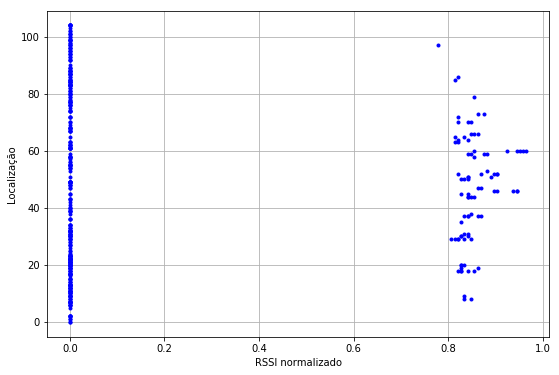

In [42]:
plt.figure(figsize=(9,6))
plt.plot(X_test['b3003'], y_test, 'b.')
plt.xlabel('RSSI normalizado')
plt.ylabel('Localização')
plt.grid(1)

Criação do modelo de regressão, treinamento e teste.

In [43]:
# criação do modelo
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# coeficientes do modelo
print('Coeficientes: \n', regr.coef_)

Coeficientes: 
 [-27.76118405 -25.43990165   7.1444228   33.93329608 -15.91293175
   0.59491741  25.09011189 -10.79176783 -47.46646616 -28.5835263
   4.77729053  16.95015258  54.25950928]


Predição sobre o conjunto de treinamento.

In [44]:
y_pred = regr.predict(X_test)

Métricas para caracterizar qualidade do modelo.

In [45]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))

print('R2 score: ', r2_score(y_test, y_pred))

Mean Absolute Error: 10.861871299713112
Mean Squared Error (MSE): 178.98149645656198
Root Mean Squared Error (RMSE): 13.37839663250279
R2 score:  0.7910092484044728


**Análise**

As métricas observadas acima indicam um resultado positivo, mostrando que o modelo construído realiza um trabalho satisfatório. Parâmetros como o R2 *score* possuem um valor máximo de 1, portanto o valor 0.79 obtido é razoavelmente bom. Além disso, a métrica RMSE também demonstra a qualidade do modelo, pois, ao analisar seu valor dentro da faixa de valores da variável alvo (posição, de 0 a 104), o resultado de 13.4 é excelente.

Gráfico de comparação entre os dados reais e o modelo encontrado para predição, considerando o *beacon* 5.

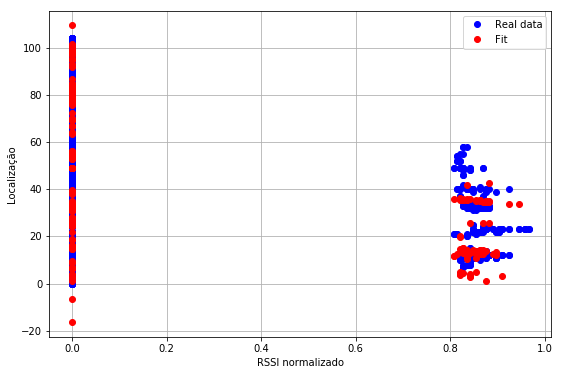

In [46]:
plt.figure(figsize=(9,6))
plt.plot(X_norm['b3005'], y, 'bo', label='Real data')
plt.xlabel('RSSI normalizado')
plt.ylabel('Localização')
plt.plot(X_test['b3005'], y_pred, 'ro', color='r', label='Fit')
plt.legend()
plt.grid(1)

---

# Conjunto de dados: UjiIndoorLoc

Importando bibliotecas necessárias para esse <i>dataset</i>

In [2]:
import cv2
import time
from IPython.display import Image
import sklearn.metrics, math

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

if not os.path.exists(os.path.join('images', '')):
    os.mkdir("images")

# Bibliotecas do tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.nn import relu, softmax
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
# more info on callbakcs: https://keras.io/callbacks/ model saver
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import l2

# import keras
# from keras.utils.vis_utils import model_to_dot

---

## Dataset description:

- Attributes 001 to 520 (WAP001-WAP520): Intensity value for WAP001. Negative integer values from -104 to 0 and +100. Positive value 100 used if WAP001 was not detected.

- Attribute 521 (Longitude): Longitude. Negative real values from -7695.9387549299299000 to -7299.786516730871000

- Attribute 522 (Latitude): Latitude. Positive real values from 4864745.7450159714 to 4865017.3646842018.

- Attribute 523 (Floor): Altitude in floors inside the building. Integer values from 0 to 4.

- Attribute 524 (BuildingID): ID to identify the building. Measures were taken in three different buildings. Categorical integer values from 0 to 2.

- Attribute 525 (SpaceID): Internal ID number to identify the Space (office, corridor, classroom) where the capture was taken. Categorical integer values.

- Attribute 526 (RelativePosition): Relative position with respect to the Space (1 - Inside, 2 - Outside in Front of the door). Categorical integer values.

- Attribute 527 (UserID): User identifier (see below). Categorical integer values.

- Attribute 528 (PhoneID): Android device identifier (see below). Categorical integer values.

- Attribute 529 (Timestamp): UNIX Time when the capture was taken. Integer value.

<i>Dataframe</i> com o conjunto de treinamento 

In [3]:
df_train = pd.read_csv('data/UJIndoorLoc/trainingData.csv')

<i>Dataframe</i> com o conjunto de validação

In [4]:
df_val = pd.read_csv('data/UJIndoorLoc/validationData.csv')

---

## Dataset info

Como apresentado na descrição do <i>dataset</i>, ele consiste de 520 <i>beacons</i> (WAP001 - WAP520) com valores de RSSI variando de -104dBm até 0dBm, atribuindo 100 para medidas em que não houve detecção. Cada medida apresenta ainda, a localização em termos de latitude, longitude, andar, prédio, espaço, dentro ou fora do prédio, usuário, telefone utilizado e dia/hora

In [5]:
df_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


Informações a respeito do conjunto de treinamento. 529 colunas com 19937 medidas. Dados representados em <i>int64</i> e <i>float64</i>.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


Para entender como melhor utilizar o conjunto de dados, foi analisado as medidas de localização.

In [7]:
floors = df_train["FLOOR"].unique()
buildings = df_train["BUILDINGID"].unique()
spaces = df_train["SPACEID"].unique()
positions = df_train["RELATIVEPOSITION"].unique()

floors.sort()
buildings.sort()
spaces.sort()
positions.sort()

print("Floors: ", floors)
print("Building ID: ", buildings)
print("Space ID: ", spaces)
print("Relative position: ", positions)

Floors:  [0 1 2 3 4]
Building ID:  [0 1 2]
Space ID:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  22  25  26  27  28  29  30 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 146 147 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 253 254]
Relative position:  [1 2]


In [8]:
len(spaces)

123

A partir desse resultado confirmamos as informações da descrição do <i>dataset</i>, temos 3 prédios, com até 5 andares, dentro e fora de tais. E ainda observamos que existem 123 ambientes classificados.

O objetivo desse experimento é prever a localização <i>indoor</i> através das coordenadas disponíveis (latitude e longitude), portanto foi separado o conjunto de dados por prédio e andar.

### Building 0

Analise e divisão por andar do prédio 0.

In [9]:
df_train_b0 = df_train[df_train["BUILDINGID"] == 0]
df_train_b0_f0 = df_train_b0[df_train_b0["FLOOR"] == 0]
df_train_b0_f1 = df_train_b0[df_train_b0["FLOOR"] == 1]
df_train_b0_f2 = df_train_b0[df_train_b0["FLOOR"] == 2]
df_train_b0_f3 = df_train_b0[df_train_b0["FLOOR"] == 3]
df_train_b0_f4 = df_train_b0[df_train_b0["FLOOR"] == 4]

df_val_b0 = df_val[df_val["BUILDINGID"] == 0]
df_val_b0_f0 = df_val_b0[df_val_b0["FLOOR"] == 0]
df_val_b0_f1 = df_val_b0[df_val_b0["FLOOR"] == 1]
df_val_b0_f2 = df_val_b0[df_val_b0["FLOOR"] == 2]
df_val_b0_f3 = df_val_b0[df_val_b0["FLOOR"] == 3]
df_val_b0_f4 = df_val_b0[df_val_b0["FLOOR"] == 4]

print("Training samples floor 0: ",df_train_b0_f0.shape[0])
print("Training samples floor 1: ",df_train_b0_f1.shape[0])
print("Training samples floor 2: ",df_train_b0_f2.shape[0])
print("Training samples floor 3: ",df_train_b0_f3.shape[0])
print("Training samples floor 4: ",df_train_b0_f4.shape[0])
print("------------------------------------------")
print("Test samples floor 0: ",df_val_b0_f0.shape[0])
print("Test samples floor 1: ",df_val_b0_f1.shape[0])
print("Test samples floor 2: ",df_val_b0_f2.shape[0])
print("Test samples floor 3: ",df_val_b0_f3.shape[0])
print("Test samples floor 4: ",df_val_b0_f4.shape[0])

Training samples floor 0:  1059
Training samples floor 1:  1356
Training samples floor 2:  1443
Training samples floor 3:  1391
Training samples floor 4:  0
------------------------------------------
Test samples floor 0:  78
Test samples floor 1:  208
Test samples floor 2:  165
Test samples floor 3:  85
Test samples floor 4:  0


Observando as amostras tanto de treinamento como de validação para os andares do prédio 0, nota-se que o prédio não possuí o andar 4 e que ambos os conjuntos se tornam muito menores após essa separação. 

Os andares 1 e 2 são os que apresentam mais amostras.

### Building 1

Analise e divisão por andar do prédio 1.

In [10]:
df_train_b1 = df_train[df_train["BUILDINGID"] == 1]
df_train_b1_f0 = df_train_b1[df_train_b1["FLOOR"] == 0]
df_train_b1_f1 = df_train_b1[df_train_b1["FLOOR"] == 1]
df_train_b1_f2 = df_train_b1[df_train_b1["FLOOR"] == 2]
df_train_b1_f3 = df_train_b1[df_train_b1["FLOOR"] == 3]
df_train_b1_f4 = df_train_b1[df_train_b1["FLOOR"] == 4]

df_val_b1 = df_val[df_val["BUILDINGID"] == 1]
df_val_b1_f0 = df_val_b1[df_val_b1["FLOOR"] == 0]
df_val_b1_f1 = df_val_b1[df_val_b1["FLOOR"] == 1]
df_val_b1_f2 = df_val_b1[df_val_b1["FLOOR"] == 2]
df_val_b1_f3 = df_val_b1[df_val_b1["FLOOR"] == 3]
df_val_b1_f4 = df_val_b1[df_val_b1["FLOOR"] == 4]

print("Training samples floor 0: ",df_train_b1_f0.shape[0])
print("Training samples floor 1: ",df_train_b1_f1.shape[0])
print("Training samples floor 2: ",df_train_b1_f2.shape[0])
print("Training samples floor 3: ",df_train_b1_f3.shape[0])
print("Training samples floor 4: ",df_train_b1_f4.shape[0])
print("------------------------------------------")
print("Test samples floor 0: ",df_val_b1_f0.shape[0])
print("Test samples floor 1: ",df_val_b1_f1.shape[0])
print("Test samples floor 2: ",df_val_b1_f2.shape[0])
print("Test samples floor 3: ",df_val_b1_f3.shape[0])
print("Test samples floor 4: ",df_val_b1_f4.shape[0])

Training samples floor 0:  1368
Training samples floor 1:  1484
Training samples floor 2:  1396
Training samples floor 3:  948
Training samples floor 4:  0
------------------------------------------
Test samples floor 0:  30
Test samples floor 1:  143
Test samples floor 2:  87
Test samples floor 3:  47
Test samples floor 4:  0


Da mesma forma que o prédio anterior, observa-se as mesmas coisas. Não existe andar 4 e amostras do andar 1 são muito maiores as demais.

### Building 2

Analise e divisão por andar do prédio 2.

In [11]:
df_train_b2 = df_train[df_train["BUILDINGID"] == 2]
df_train_b2_f0 = df_train_b2[df_train_b2["FLOOR"] == 0]
df_train_b2_f1 = df_train_b2[df_train_b2["FLOOR"] == 1]
df_train_b2_f2 = df_train_b2[df_train_b2["FLOOR"] == 2]
df_train_b2_f3 = df_train_b2[df_train_b2["FLOOR"] == 3]
df_train_b2_f4 = df_train_b2[df_train_b2["FLOOR"] == 4]

df_val_b2 = df_val[df_val["BUILDINGID"] == 2]
df_val_b2_f0 = df_val_b2[df_val_b2["FLOOR"] == 0]
df_val_b2_f1 = df_val_b2[df_val_b2["FLOOR"] == 1]
df_val_b2_f2 = df_val_b2[df_val_b2["FLOOR"] == 2]
df_val_b2_f3 = df_val_b2[df_val_b2["FLOOR"] == 3]
df_val_b2_f4 = df_val_b2[df_val_b2["FLOOR"] == 4]

print("Training samples floor 0: ",df_train_b2_f0.shape[0])
print("Training samples floor 1: ",df_train_b2_f1.shape[0])
print("Training samples floor 2: ",df_train_b2_f2.shape[0])
print("Training samples floor 3: ",df_train_b2_f3.shape[0])
print("Training samples floor 4: ",df_train_b2_f4.shape[0])
print("------------------------------------------")
print("Test samples floor 0: ",df_val_b2_f0.shape[0])
print("Test samples floor 1: ",df_val_b2_f1.shape[0])
print("Test samples floor 2: ",df_val_b2_f2.shape[0])
print("Test samples floor 3: ",df_val_b2_f3.shape[0])
print("Test samples floor 4: ",df_val_b2_f4.shape[0])

Training samples floor 0:  1942
Training samples floor 1:  2162
Training samples floor 2:  1577
Training samples floor 3:  2709
Training samples floor 4:  1102
------------------------------------------
Test samples floor 0:  24
Test samples floor 1:  111
Test samples floor 2:  54
Test samples floor 3:  40
Test samples floor 4:  39


Esse é o único prédio que possuí o andar 4. Novamente as conclusões obtidas anteriormentes se repetem, porém nota-se que possuí mais amostras de treinamento nesse prédio.

---

## Functions

Função para normalizar a RSSI

In [12]:
def normalize(x):
    return (x-x.min())/(x.max()-x.min())

Função para criar os conjuntos de treinamento e validação normalizados e ajustados.

Para as medidas de RSSI, os valores "100" que correspondem a não detecção de sinal foram transformadas em um valor menor que o mínimo do dataset de -110 para facilitar a normalização.

Para os valores das coordenadas, foi subtraído do conjunto o valor mínimo para que assim tenha medidas começando do valor 0 e podendo ser verificada as dimensões de forma mais simples, visto que agora representam valores em metros.

In [13]:
def set_train_val(df_train, df_val):
    X_train = df_train.loc[:, 'WAP001':'WAP520'].values
    y_train = df_train.loc[:, 'LONGITUDE':'LATITUDE'].values

    X_val = df_val.loc[:, 'WAP001':'WAP520'].values
    y_val = df_val.loc[:, 'LONGITUDE':'LATITUDE'].values
    
    y_train_spaces = df_train.loc[:, 'SPACEID'].values
    y_val_spaces = df_val.loc[:, 'SPACEID'].values
    
    X_train[X_train == 100] = -110
    X_val[X_val == 100] = -110

    X_train = normalize(X_train)
    X_val = normalize(X_val)
    
    y_train[:,0] = y_train[:,0] - y_train[:,0].min()
    y_train[:,1] = y_train[:,1] - y_train[:,1].min()

    y_val[:,0] = y_val[:,0] - y_val[:,0].min()
    y_val[:,1] = y_val[:,1] - y_val[:,1].min()
    
    dataset = {"X_train": X_train, "X_val": X_val, "y_train": y_train, "y_val": y_val, "y_train_spaces": y_train_spaces, "y_val_spaces": y_val_spaces}
    
    return dataset

Função para comparar métricas obtidas a partir de 3 algoritmos de regressão Support Vector Regression, Random Forest Regressor e K-Nearest Neighbors Regressor. 

A priori são definidos valores estimados padrões de hiperparâmetros e depois com um Grid Search com Cross Validation é feito a melhor escolha de hiperparâmetros com as listas disponíveis.

As métricas e parâmetros de cada método é printada.

In [14]:
def compare_regression_methods(X_train, X_test, y_train, y_test):
    # SVM
    gamma = 1
    model = SVR(C=1, kernel='rbf', gamma = gamma)
    svm = MultiOutputRegressor(model)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print("Support Vector Regression\n")
    metrics(y_test, y_pred)
    
    # SVM grid search
    params = {'estimator__C': [0.001, 0.01, 0.1, 1, 10], 
          'estimator__kernel': ['rbf'],
          'estimator__gamma': [0.001, 0.01, 0.1, 1]}

    model = SVR()
    svm = MultiOutputRegressor(model)
    grid_search_svm = GridSearchCV(estimator=svm, param_grid=params,n_jobs=-1, verbose=0)
    grid_search_svm.fit(X_train, y_train)
    
    best_grid = grid_search_svm.best_estimator_
    y_pred = best_grid.predict(X_test)
    print("\nGrid Search\n")
    metrics(y_test, y_pred)
    print("Params selected: ", grid_search_svm.best_params_)
    
    # Random forest
    model = RandomForestRegressor(n_estimators=20, max_depth=9)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\nRandom Forest Regressor\n")
    metrics(y_test, y_pred)
    
    # Random forest grid search
    param_grid_rf = {'n_estimators': [5,10,15,20,25,40],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [5,7,10,20,30,60],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
    
    rf = RandomForestRegressor()
    grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,n_jobs=-1, verbose=0)
    grid_search_rf.fit(X_train, y_train)   
    
    best_grid_rf = grid_search_rf.best_estimator_
    y_pred = best_grid_rf.predict(X_test)
    print("\nGrid Search\n")
    metrics(y_test, y_pred)
    print("Params selected: ", grid_search_rf.best_params_)
    
    # k-NN
    model = KNeighborsRegressor(n_neighbors=15)
    knn = MultiOutputRegressor(model)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("\nK-Nearest Neighbors Regressor\n")
    metrics(y_test, y_pred)

    
    # k-NN grid search
    params_knn = {'estimator__n_neighbors':[5,10,15,20,25,35,50],
                  'estimator__leaf_size':[1,3,5,7,9,12],
                  'estimator__weights':['uniform', 'distance'],
                  'estimator__algorithm':['auto','ball_tree','kd_tree','brute']}

    model = KNeighborsRegressor()
    knn = MultiOutputRegressor(model)
    grid_search_knn = GridSearchCV(estimator=knn, param_grid=params_knn,n_jobs=-1, verbose=0)
    grid_search_knn.fit(X_train, y_train)
    
    best_grid_knn = grid_search_knn.best_estimator_
    y_pred = best_grid_knn.predict(X_test)
    print("\nGrid Search\n")
    metrics(y_test, y_pred)
    print("Params selected: ", grid_search_knn.best_params_)

Função para redimensionar o conjunto de dados em 2D e poder ser representado como uma imagem.

In [15]:
def CNN_reshape(X_train, X_val):
    X_train_img = X_train.reshape(X_train.shape[0],20,26)
    X_val_img = X_val.reshape(X_val.shape[0],20,26)
    
    X_train = X_train.reshape(X_train.shape[0],20,26,1)
    X_val = X_val.reshape(X_val.shape[0],20,26,1)
    
    return X_train_img, X_val_img, X_train, X_val

Funções para utilizar as métricas no Keras

In [16]:
# root mean squared error (rmse) for regression (only for Keras tensors)
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression  (only for Keras tensors)
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

Função para criação da rede neural profunda, podendo ser variado a quantidade de camadas, unidades, dropout, épocas, taxa de aprendizado.

Ativações RELU na camadas, otimizador ADAM e função de perda MSE. Modelo de regressão.

Uma imagem da estrutura do modelo é salva para a pasta "images/" e um log com a acurácia e perdas de treinamento e validação são gerados na pasta "logs" para uma visualização do modelo via TensorBoard.

Na linha de comando dentro do diretório do ipynb digitar:

tensorboard --logdir=logs/

In [17]:
def DNN(building, floor, X_train, y_train, X_val, y_val, units, layers, dropout, epoch, rate):
    NAME = f"DNN-Building{building}-Floor{floor}-DNN-units{units}-layers{layers}-dropout{dropout}-epoch{epoch}-lr{rate}-{int(time.time())}"
    print(NAME)

    model = Sequential()

    model.add(Dense(units , input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    
    for l in range(layers - 1):
        model.add(Dense(units , input_shape=X_train.shape[1:]))
        model.add(Activation('relu'))
        model.add(Dropout(dropout))

    model.add(Dense(2))

    plot_model(model, to_file= 'images/' + NAME + '.png', show_shapes=True, show_layer_names=True)
    
    tensorboard = TensorBoard(log_dir=f"logs/{NAME}")

    adam = Adam(lr=rate)

    model.compile(optimizer=adam,
                  loss='mean_squared_error',
                  metrics=[rmse, r_square])

    history = model.fit(X_train, y_train,
              batch_size=100,
              epochs=epoch,
              validation_data=(X_val, y_val),
              callbacks=[tensorboard])
    return model, history

Função para criação da rede neural convolucional, podendo ser variado a quantidade de camadas, unidades, filtros, kernel, maxpooling, dropout, épocas, taxa de aprendizado.

Estrutura baseada em 1 camada convolucional com 64 filtros + N camadas com M filtros, e P camadas densas.

Ativações RELU na camadas, otimizador ADAM e função de perda MSE. Modelo de regressão.

Uma imagem da estrutura do modelo é salva para a pasta "images/" e um log com a acurácia e perdas de treinamento e validação são gerados na pasta "logs" para uma visualização do modelo via TensorBoard.

Na linha de comando dentro do diretório do ipynb digitar:

tensorboard --logdir=logs/

In [18]:
def CNN1(building, floor, X_train, y_train, X_val, y_val, conv_filters, conv_layers, kernel_size, dense_units, dense_layers, maxpooling, dropout, dropout_pct, epoch, rate):
    NAME = f"CNN-Building{building}-Floor{floor}-ConvLayers{conv_layers}-ConvUnits{conv_filters}-lr{rate}-DenseLayer{dense_layers}-DenseUnits{dense_units}-MaxPool-{maxpooling}-Dropout{dropout_pct}-{int(time.time())}"
    print(NAME)

    model = Sequential()

    model.add(Conv2D(64, kernel_size=(3,3),padding='same', input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))

    for conv in range(conv_layers - 1):
        model.add(Conv2D(conv_filters, kernel_size, padding='same'))
        model.add(Activation('relu'))
        if maxpooling:
            model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
        if dropout:
            model.add(Dropout(dropout_pct))
        
    model.add(Flatten())

    for dense in range(dense_layers):
        model.add(Dense(dense_units))
        model.add(Activation('relu'))
        model.add(Dropout(dropout_pct))

    model.add(Dense(2))

    plot_model(model, to_file= 'images/' + NAME + '.png', show_shapes=True, show_layer_names=True)
    
    tensorboard = TensorBoard(log_dir=f"logs/{NAME}")

    opt = Adam(lr=rate)

    model.compile(loss='mean_squared_error',
                  optimizer=opt,
                  metrics=[rmse, r_square])

    history = model.fit(X_train, y_train,
              batch_size=100,
              epochs=epoch,
              verbose=1,
              validation_data=(X_val, y_val),
              callbacks=[tensorboard])
    return model, history

Função para criação da rede neural convolucional, podendo ser variado a quantidade de camadas, unidades, filtros, kernel, maxpooling, dropout, épocas, taxa de aprendizado.

Estrutura baseada em N1 camadas convolucionais com M1 filtros + N2 camadas convolucionais com M2 filtros e P camadas densas

Ativações RELU na camadas, otimizador ADAM e função de perda MSE. Modelo de regressão.

Uma imagem da estrutura do modelo é salva para a pasta "images/" e um log com a acurácia e perdas de treinamento e validação são gerados na pasta "logs" para uma visualização do modelo via TensorBoard.

Na linha de comando dentro do diretório do ipynb digitar:

tensorboard --logdir=logs/

In [19]:
def CNN2(building, floor, X_train, y_train, X_val, y_val, conv_filters1, conv_filters2, conv_layers1, conv_layers2, kernel_size, dense_units, dense_layers, maxpooling, pool, dropout_pct, epoch, rate):
    NAME = f"CNN-Building{building}-Floor{floor}-ConvL1{conv_layers1}-ConvL2{conv_layers2}-ConvF1{conv_filters1}-ConvF2{conv_filters2}-lr{rate}-DenseLayer{dense_layers}-DenseUnits{dense_units}-MaxPool-{maxpooling}-{pool}-Dropout{dropout_pct}-{int(time.time())}"
    print(NAME)

    model = Sequential()

    model.add(Conv2D(conv_filters1, kernel_size,padding='same', input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))

    for conv_l1 in range(conv_layers1 - 1):
        model.add(Conv2D(conv_filters1, kernel_size, padding='same'))
        model.add(Activation('relu'))

    for conv_l2 in range(conv_layers2):
        model.add(Conv2D(conv_filters2, kernel_size, padding='same'))
        model.add(Activation('relu'))
    
    if maxpooling:
        model.add(MaxPooling2D(pool_size=pool, padding='same'))
    
    model.add(Dropout(dropout_pct))

    model.add(Flatten())

    for dense_l in range(dense_layers):
        model.add(Dense(dense_units))
        
    model.add(Activation('relu'))
    model.add(Dropout(dropout_pct))

    model.add(Dense(2))

    plot_model(model, to_file= 'images/' + NAME + '.png', show_shapes=True, show_layer_names=True)

    tensorboard = TensorBoard(log_dir=f"logs/{NAME}")

    opt = Adam(lr=rate)

    model.compile(loss='mean_squared_error',
                  optimizer=opt,
                  metrics=[rmse, r_square])

    history = model.fit(X_train, y_train,
              batch_size=100,
              epochs=epoch,
              verbose=1,
              validation_data=(X_val, y_val),
              callbacks=[tensorboard])
    return model, history

Função para printar as métricas dos algoritmos de regressão.

In [20]:
def metrics(y_val, y_pred):
    print("Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(y_val,y_pred))
    print("Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(y_val,y_pred))
    print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_val,y_pred)))
    print("R square (R^2):                 %f" % sklearn.metrics.r2_score(y_val,y_pred))

Função para os plots de acurácia e perda do modelo por época de treinamento.

In [21]:
def plot_metrics(history, name):
    f, ax = plt.subplots(1, 3,figsize=(16,4))

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Mean squared error')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('MSE')
    ax[0].legend(['Train', 'Test'], loc='upper left')

    ax[1].plot(history.history['rmse'])
    ax[1].plot(history.history['val_rmse'])
    ax[1].set_title('Root mean squared error')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('RMSE')
    ax[1].legend(['Train', 'Test'], loc='upper left')
    
    ax[2].plot(history.history['r_square'])
    ax[2].plot(history.history['val_r_square'])
    ax[2].set_title('R2 score')
    ax[2].set_xlabel('Epoch')
    ax[2].set_ylabel('R2')
    ax[2].legend(['Train', 'Test'], loc='upper left')

    plt.savefig('images/'+ name +'.png', bbox_inches='tight',dpi=300)
    plt.show()

Função para plot da predição comparada com o original

In [22]:
def plot_pred(y_pred, y_val, name):
    f, ax = plt.subplots(1, 2,figsize=(10,4))

    ax[0].plot(y_pred[:,0], y_pred[:,1] , 'bo')
    ax[0].set_title("Predição")
    ax[0].set_xlabel("Scaled longitude")
    ax[0].set_ylabel("Scaled latitude")

    ax[1].plot(y_val[:,0], y_val[:,1] , 'ro')
    ax[1].set_title("Validation")
    ax[1].set_xlabel("Scaled longitude")
    ax[1].set_ylabel("Scaled latitude")
    
    plt.savefig('images/'+ name +'.png', bbox_inches='tight',dpi=300)
    plt.show()

---

Visto pelas analises anteriores, o andar 1 e 2 são os que apresentam a maior quantidade de amostras e portanto foram os escolhidos para o estudo.

## Building 0 Floor 1 

Criando o dataset normalizado para o primeiro andar do prédio 0

In [23]:
dataset = set_train_val(df_train_b0_f1, df_val_b0_f1)

X_train_b0_f1 = dataset["X_train"]
X_val_b0_f1 = dataset["X_val"]

y_train_b0_f1 = dataset["y_train"]
y_val_b0_f1 = dataset["y_val"]

Imagem dos 3 prédios na ordem: prédio 0, prédio 1, prédio 2.

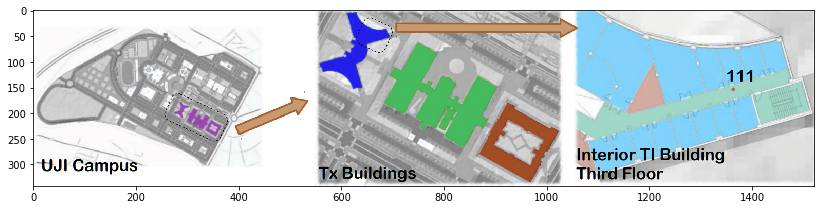

In [24]:
img = cv2.imread('data/UJIndoorLoc/UjiBuildings.PNG')
plt.figure(figsize=(14,10))
plt.imshow(img)
plt.show()

Plotando os valores das coordenadas de treinamento e validação

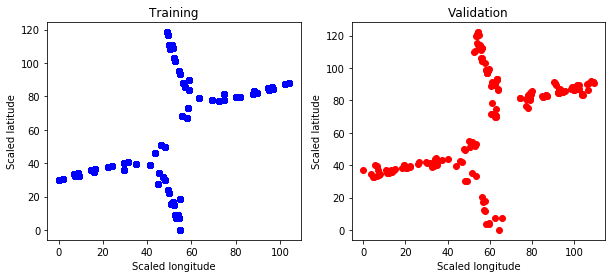

In [25]:
f, ax = plt.subplots(1, 2,figsize=(10,4))

ax[0].plot(y_train_b0_f1[:,0], y_train_b0_f1[:,1] , 'bo')
ax[0].set_title("Training")
ax[0].set_xlabel("Scaled longitude")
ax[0].set_ylabel("Scaled latitude")

ax[1].plot(y_val_b0_f1[:,0], y_val_b0_f1[:,1] , 'ro')
ax[1].set_title("Validation")
ax[1].set_xlabel("Scaled longitude")
ax[1].set_ylabel("Scaled latitude")

plt.savefig('images/b0f1.png', bbox_inches='tight',dpi=300)
plt.show()

Observa-se como a forma representa muito bem o prédio 0 do campus.

### Comparison between K-NN, SVM and RandomForest

In [35]:
compare_regression_methods(X_train_b0_f1, X_val_b0_f1, y_train_b0_f1, y_val_b0_f1)

Support Vector Regression

Mean absolute error (MAE):      13.136977
Mean squared error (MSE):       276.396978
Root mean squared error (RMSE): 16.625191
R square (R^2):                 0.662755

Grid Search

Mean absolute error (MAE):      11.635711
Mean squared error (MSE):       221.319464
Root mean squared error (RMSE): 14.876810
R square (R^2):                 0.729943
Params selected:  {'estimator__C': 10, 'estimator__gamma': 1, 'estimator__kernel': 'rbf'}

Random Forest Regressor

Mean absolute error (MAE):      9.038024
Mean squared error (MSE):       223.444746
Root mean squared error (RMSE): 14.948068
R square (R^2):                 0.727303

Grid Search

Mean absolute error (MAE):      6.475503
Mean squared error (MSE):       86.521086
Root mean squared error (RMSE): 9.301671
R square (R^2):                 0.894387
Params selected:  {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}

K-Nearest Nei

### Deep Neural Network

Treinamento com uma rede neural profunda com 3 camadas de 500 unidades, com uma camada de dropout logo após de cada uma para evitar overfitting.

In [45]:
model, history = DNN(building=0, floor=1,
                     X_train = X_train_b0_f1,
                     y_train = y_train_b0_f1, 
                     X_val = X_val_b0_f1,
                     y_val = y_val_b0_f1,
                     units=500, 
                     layers=3, 
                     dropout=0.5, 
                     epoch=30,
                     rate=0.001)

DNN-Building0-Floor1-DNN-units500-layers3-dropout0.5-epoch30-lr0.001-1543861929


Using TensorFlow backend.


Train on 1356 samples, validate on 208 samples
Epoch 1/30
1356/1356 [==============================] - 1s 677us/step - loss: 3617.3394 - rmse: 54.5724 - r_square: -3.1626 - val_loss: 3004.5770 - val_rmse: 48.6575 - val_r_square: -3.8772
Epoch 2/30
1356/1356 [==============================] - 0s 63us/step - loss: 1009.1193 - rmse: 27.7895 - r_square: -0.1641 - val_loss: 669.6439 - val_rmse: 21.7073 - val_r_square: -0.0406
Epoch 3/30
1356/1356 [==============================] - 0s 63us/step - loss: 463.8368 - rmse: 19.3492 - r_square: 0.4659 - val_loss: 586.2746 - val_rmse: 20.8274 - val_r_square: 0.0957
Epoch 4/30
1356/1356 [==============================] - 0s 64us/step - loss: 363.7355 - rmse: 16.8959 - r_square: 0.5807 - val_loss: 543.6955 - val_rmse: 19.6852 - val_r_square: 0.1977
Epoch 5/30
1356/1356 [==============================] - 0s 63us/step - loss: 284.9997 - rmse: 14.8676 - r_square: 0.6734 - val_loss: 447.6793 - val_rmse: 17.5620 - val_r_square: 0.3358
Epoch 6/30
1356/1356

Modelo da DNN utilizada

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               260500    
_________________________________________________________________
activation (Activation)      (None, 500)               0         
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
__________

Plot das métricas utilizadas para a regressão (MSE, RMSE e R2 score) a cada época

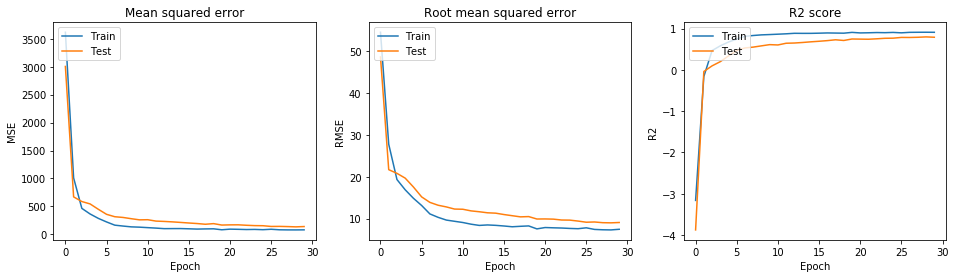

In [57]:
plot_metrics(history, "b0f1_metrics")

Curvas de erro demonstram boa taxa de aprendizado, não necessidade de tantas épocas devido a saturação e sem divergir.

In [52]:
metrics = model.evaluate(X_val_b0_f1, y_val_b0_f1)

208/208 [==============================] - 0s 72us/step


In [53]:
print("Mean squared error (MSE):", metrics[0])
print("Root mean squared error (RMSE):", metrics[1])
print("R square (R^2):", metrics[2])

Mean squared error (MSE): 138.58434471717248
Root mean squared error (RMSE): 9.07418155670166
R square (R^2): 0.7376854924055246


Score R2 razoável, visto que o melhor possível é de 1. Porém poderia ser melhor

Fazendo a predição do conjunto de validação utilizando o modelo treinado.

In [54]:
y_pred = model.predict(X_val_b0_f1)

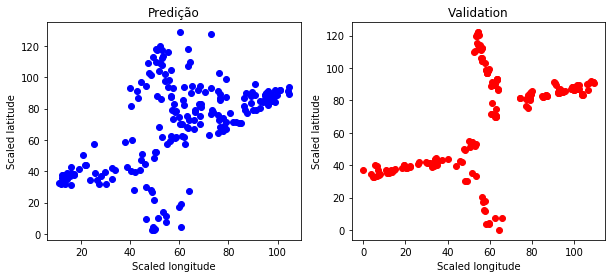

In [56]:
plot_pred(y_pred, y_val_b0_f1, "b0f1_pred")

O modelo aparenta ter dificuldade de avaliar os valores de validação visto os de treinamento. Apesar da forma relembrar ao do prédio, alguns pontos fogem muito do real.

### CNN

Preparando o conjunto de dados para ser utilizado pela rede convolucional

In [26]:
X_train_b0_f1_img, X_val_b0_f1_img, X_train_b0_f1, X_val_b0_f1 = CNN_reshape(X_train_b0_f1, X_val_b0_f1)

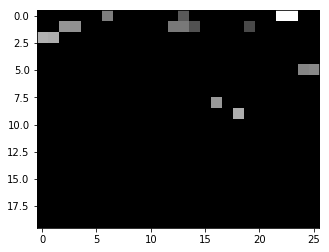

In [27]:
plt.imshow(1- X_train_b0_f1_img[6],cmap=plt.cm.binary)
plt.savefig('images/2d_b0f1.png', bbox_inches='tight',dpi=300)
plt.show()

Imagem 2D representando a RSSI de todos os WAP.

### Modelo 1

2 camadas convolucionais com 64 e 128 filtros respectivamente, dropout 0.5, 1 camada densa de 300 unidades, dropout 0.5

In [28]:
model, history = CNN1(building=0,
                     floor=1,
                     X_train=X_train_b0_f1,
                     y_train=y_train_b0_f1,
                     X_val=X_val_b0_f1,
                     y_val=y_val_b0_f1,
                     conv_filters=128,
                     conv_layers=2,
                     kernel_size=(2,2),
                     dense_units=300,
                     dense_layers=1,
                     maxpooling=True,
                     dropout=True,
                     dropout_pct=0.3,
                     epoch=70,
                     rate=0.001)

CNN-Building0-Floor1-ConvLayers2-ConvUnits128-lr0.001-DenseLayer1-DenseUnits300-MaxPool-True-Dropout0.3-1543873417


Using TensorFlow backend.


Train on 1356 samples, validate on 208 samples
Epoch 1/70
1356/1356 [==============================] - 2s 1ms/step - loss: 2754.9952 - rmse: 46.1348 - r_square: -2.1607 - val_loss: 1293.1116 - val_rmse: 29.6687 - val_r_square: -0.6742
Epoch 2/70
1356/1356 [==============================] - 0s 301us/step - loss: 1040.2193 - rmse: 28.5264 - r_square: -0.1854 - val_loss: 1127.9284 - val_rmse: 30.5782 - val_r_square: -0.7718
Epoch 3/70
1356/1356 [==============================] - 0s 301us/step - loss: 601.2760 - rmse: 22.0604 - r_square: 0.3105 - val_loss: 758.9712 - val_rmse: 24.4702 - val_r_square: -0.1609
Epoch 4/70
1356/1356 [==============================] - 0s 299us/step - loss: 360.2875 - rmse: 16.5172 - r_square: 0.5878 - val_loss: 482.5989 - val_rmse: 18.8742 - val_r_square: 0.2703
Epoch 5/70
1356/1356 [==============================] - 0s 299us/step - loss: 265.5110 - rmse: 14.3543 - r_square: 0.6953 - val_loss: 385.1756 - val_rmse: 16.5958 - val_r_square: 0.4091
Epoch 6/70
1356/

1356/1356 [==============================] - 0s 310us/step - loss: 49.2207 - rmse: 5.9645 - r_square: 0.9436 - val_loss: 107.3911 - val_rmse: 8.5542 - val_r_square: 0.8448
Epoch 46/70
1356/1356 [==============================] - 0s 311us/step - loss: 48.6812 - rmse: 5.9842 - r_square: 0.9434 - val_loss: 112.9944 - val_rmse: 8.7523 - val_r_square: 0.8343
Epoch 47/70
1356/1356 [==============================] - 0s 302us/step - loss: 45.3181 - rmse: 5.8010 - r_square: 0.9478 - val_loss: 111.1156 - val_rmse: 8.6907 - val_r_square: 0.8369
Epoch 48/70
1356/1356 [==============================] - 0s 309us/step - loss: 49.4286 - rmse: 5.9922 - r_square: 0.9428 - val_loss: 118.3240 - val_rmse: 9.0136 - val_r_square: 0.8239
Epoch 49/70
1356/1356 [==============================] - 0s 306us/step - loss: 47.3850 - rmse: 5.9308 - r_square: 0.9455 - val_loss: 119.2642 - val_rmse: 8.9957 - val_r_square: 0.8226
Epoch 50/70
1356/1356 [==============================] - 0s 303us/step - loss: 48.7195 - rms

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 20, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 20, 26, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 26, 128)       32896     
_________________________________________________________________
activation_1 (Activation)    (None, 20, 26, 128)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 13, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 13, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 16640)             0         
__________

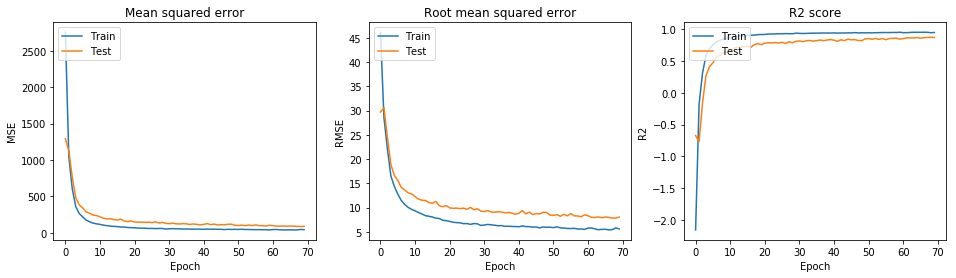

In [30]:
plot_metrics(history, "cnn1_b0f1_metrics")

In [31]:
metrics = model.evaluate(X_val_b0_f1, y_val_b0_f1)

208/208 [==============================] - 0s 197us/step


In [32]:
print("Mean squared error (MSE):", metrics[0])
print("Root mean squared error (RMSE):", metrics[1])
print("R square (R^2):", metrics[2])

Mean squared error (MSE): 89.32113236647386
Root mean squared error (RMSE): 8.03851267007681
R square (R^2): 0.8287872167734


Melhora em termos de desempenho em relação à DNN.

In [33]:
y_pred = model.predict(X_val_b0_f1)

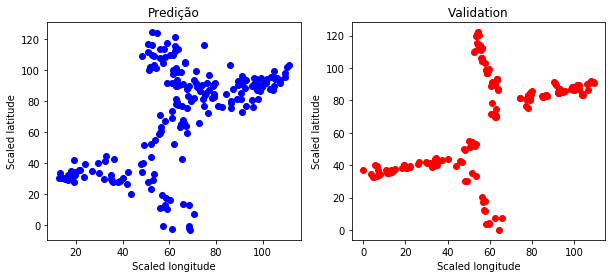

In [34]:
plot_pred(y_pred, y_val_b0_f1,"cnn1_b0f1_pred")

Forma da distribuição da imagem melhor distribuida

### Modelo 2

5 camadas convolucionais (2 primeiras com 64 filtros e outras 3 com 128), maxpooling, dropout 0.5 e 2 camada densa com 128 unidades, dropout 0.5

In [35]:
model, history = CNN2(building=0,
                     floor=1,
                     X_train=X_train_b0_f1,
                     y_train=y_train_b0_f1,
                     X_val=X_val_b0_f1,
                     y_val=y_val_b0_f1,
                     conv_filters1=64,
                     conv_filters2=128,
                     conv_layers1=2,
                     conv_layers2=3,
                     kernel_size=(2,2),
                     dense_units=128,
                     dense_layers=2,
                     maxpooling=True,
                     pool=(2,2),
                     dropout_pct=0.5,
                     epoch=70,
                     rate=0.001)

CNN-Building0-Floor1-ConvL12-ConvL23-ConvF164-ConvF2128-lr0.001-DenseLayer2-DenseUnits128-MaxPool-True-(2, 2)-Dropout0.5-1543873530
Train on 1356 samples, validate on 208 samples
Epoch 1/70
1356/1356 [==============================] - 1s 1ms/step - loss: 2574.0049 - rmse: 44.1604 - r_square: -1.9842 - val_loss: 2687.1543 - val_rmse: 46.5176 - val_r_square: -3.3620
Epoch 2/70
1356/1356 [==============================] - 1s 646us/step - loss: 1281.2097 - rmse: 31.4035 - r_square: -0.4704 - val_loss: 1595.9549 - val_rmse: 35.7158 - val_r_square: -1.5757
Epoch 3/70
1356/1356 [==============================] - 1s 652us/step - loss: 864.9083 - rmse: 26.0023 - r_square: 0.0047 - val_loss: 954.4787 - val_rmse: 27.5160 - val_r_square: -0.5073
Epoch 4/70
1356/1356 [==============================] - 1s 652us/step - loss: 535.2735 - rmse: 20.2896 - r_square: 0.3883 - val_loss: 532.7761 - val_rmse: 19.7624 - val_r_square: 0.1705
Epoch 5/70
1356/1356 [==============================] - 1s 650us/step 

1356/1356 [==============================] - 1s 655us/step - loss: 132.7552 - rmse: 9.6028 - r_square: 0.8468 - val_loss: 128.3791 - val_rmse: 9.5433 - val_r_square: 0.8092
Epoch 45/70
1356/1356 [==============================] - 1s 669us/step - loss: 127.3605 - rmse: 9.5626 - r_square: 0.8536 - val_loss: 146.9513 - val_rmse: 10.4369 - val_r_square: 0.7769
Epoch 46/70
1356/1356 [==============================] - 1s 656us/step - loss: 117.8669 - rmse: 9.0727 - r_square: 0.8648 - val_loss: 137.4157 - val_rmse: 10.0570 - val_r_square: 0.7910
Epoch 47/70
1356/1356 [==============================] - 1s 661us/step - loss: 125.7336 - rmse: 9.2616 - r_square: 0.8553 - val_loss: 146.2015 - val_rmse: 10.5030 - val_r_square: 0.7781
Epoch 48/70
1356/1356 [==============================] - 1s 661us/step - loss: 117.0426 - rmse: 9.0280 - r_square: 0.8645 - val_loss: 99.1073 - val_rmse: 8.4042 - val_r_square: 0.8524
Epoch 49/70
1356/1356 [==============================] - 1s 658us/step - loss: 117.29

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 20, 26, 64)        320       
_________________________________________________________________
activation_3 (Activation)    (None, 20, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 26, 64)        16448     
_________________________________________________________________
activation_4 (Activation)    (None, 20, 26, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 26, 128)       32896     
_________________________________________________________________
activation_5 (Activation)    (None, 20, 26, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 26, 128)       65664     
__________

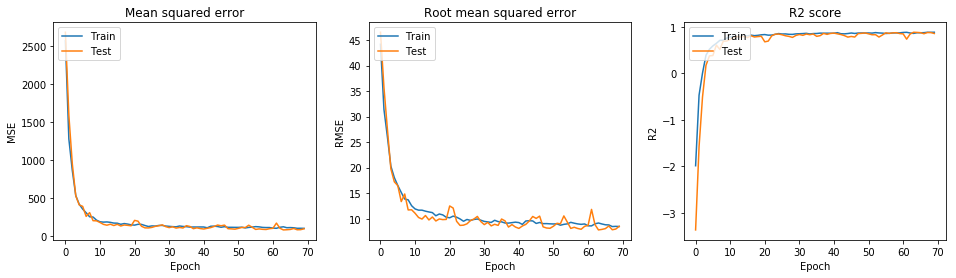

In [37]:
plot_metrics(history, "cnn2_b0f1_metrics")

In [38]:
metrics = model.evaluate(X_val_b0_f1, y_val_b0_f1)

208/208 [==============================] - 0s 417us/step


In [39]:
print("Mean squared error (MSE):", metrics[0])
print("Root mean squared error (RMSE):", metrics[1])
print("R square (R^2):", metrics[2])

Mean squared error (MSE): 97.72911306527945
Root mean squared error (RMSE): 8.510341791006235
R square (R^2): 0.8118042349815369


Resultado parecido com o primeiro modelo mesmo com menos parâmetros aumentando o numero de camadas convolucionais e diminuindo as unidades das camadas densas.

In [40]:
y_pred = model.predict(X_val_b0_f1)

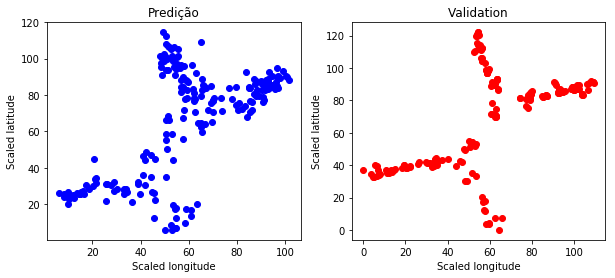

In [41]:
plot_pred(y_pred, y_val_b0_f1, "cnn2_b0f1_pred")

Ambos resultados desempenharam melhores do que a rede neural profunda.

## Building 0 Floor 2

Criando o dataset normalizado para o segundo andar do prédio 0

In [42]:
dataset = set_train_val(df_train_b0_f2, df_val_b0_f2)

X_train_b0_f2 = dataset["X_train"]
X_val_b0_f2 = dataset["X_val"]

y_train_b0_f2 = dataset["y_train"]
y_val_b0_f2 = dataset["y_val"]

Imagem dos 3 prédios na ordem: prédio 0, prédio 1, prédio 2.

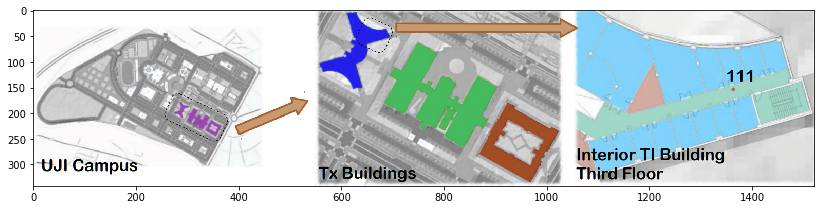

In [43]:
img = cv2.imread('data/UJIndoorLoc/UjiBuildings.PNG')
plt.figure(figsize=(14,10))
plt.imshow(img)
plt.show()

Plotando os valores das coordenadas de treinamento e validação

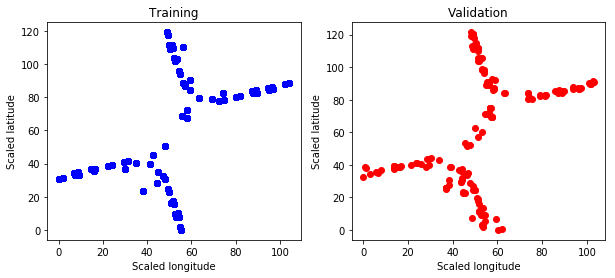

In [44]:
f, ax = plt.subplots(1, 2,figsize=(10,4))

ax[0].plot(y_train_b0_f2[:,0], y_train_b0_f2[:,1] , 'bo')
ax[0].set_title("Training")
ax[0].set_xlabel("Scaled longitude")
ax[0].set_ylabel("Scaled latitude")

ax[1].plot(y_val_b0_f2[:,0], y_val_b0_f2[:,1] , 'ro')
ax[1].set_title("Validation")
ax[1].set_xlabel("Scaled longitude")
ax[1].set_ylabel("Scaled latitude")

plt.savefig('images/b0f2.png', bbox_inches='tight',dpi=300)
plt.show()

Observa-se como a forma representa muito bem o prédio do campus.

### Comparison between K-NN, SVM and RandomForest

In [37]:
compare_regression_methods(X_train_b0_f2, X_val_b0_f2, y_train_b0_f2, y_val_b0_f2)

Support Vector Regression

Mean absolute error (MAE):      11.322015
Mean squared error (MSE):       244.901614
Root mean squared error (RMSE): 15.649333
R square (R^2):                 0.713144

Grid Search

Mean absolute error (MAE):      10.047078
Mean squared error (MSE):       218.437995
Root mean squared error (RMSE): 14.779648
R square (R^2):                 0.749417
Params selected:  {'estimator__C': 10, 'estimator__gamma': 1, 'estimator__kernel': 'rbf'}

Random Forest Regressor

Mean absolute error (MAE):      4.623412
Mean squared error (MSE):       40.190096
Root mean squared error (RMSE): 6.339566
R square (R^2):                 0.942041

Grid Search

Mean absolute error (MAE):      4.533907
Mean squared error (MSE):       37.971933
Root mean squared error (RMSE): 6.162137
R square (R^2):                 0.945687
Params selected:  {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}

K-Nearest Neigh

### Deep Neural Network

Treinamento com uma rede neural profunda com 3 camadas de 500 unidades, com uma camada de dropout logo após de cada uma para evitar overfitting. 

In [86]:
model, history = DNN(building=0, floor=2,
                     X_train = X_train_b0_f2,
                     y_train = y_train_b0_f2, 
                     X_val = X_val_b0_f2,
                     y_val = y_val_b0_f2,
                     units=500, 
                     layers=3, 
                     dropout=0.5, 
                     epoch=30,
                     rate= 0.001)

DNN-Building0-Floor2-DNN-units500-layers3-dropout0.5-epoch30-lr0.001-1543862473
Train on 1443 samples, validate on 165 samples
Epoch 1/30
1443/1443 [==============================] - 0s 251us/step - loss: 3543.7328 - rmse: 53.9982 - r_square: -3.0293 - val_loss: 1576.3411 - val_rmse: 34.0122 - val_r_square: -0.8785
Epoch 2/30
1443/1443 [==============================] - 0s 64us/step - loss: 880.1995 - rmse: 25.9771 - r_square: 0.0023 - val_loss: 516.6618 - val_rmse: 20.5065 - val_r_square: 0.3825
Epoch 3/30
1443/1443 [==============================] - 0s 65us/step - loss: 475.5760 - rmse: 19.6546 - r_square: 0.4593 - val_loss: 432.4373 - val_rmse: 18.4760 - val_r_square: 0.4819
Epoch 4/30
1443/1443 [==============================] - 0s 66us/step - loss: 358.8106 - rmse: 16.8334 - r_square: 0.5906 - val_loss: 418.0733 - val_rmse: 17.4392 - val_r_square: 0.5069
Epoch 5/30
1443/1443 [==============================] - 0s 61us/step - loss: 248.7820 - rmse: 13.7645 - r_square: 0.7148 - val_l

Modelo da DNN utilizada

In [87]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 500)               260500    
_________________________________________________________________
activation_18 (Activation)   (None, 500)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_19 (Activation)   (None, 500)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 500)               250500    
__________

Plot das métricas utilizadas para a regressão (MSE, RMSE e R2 score)

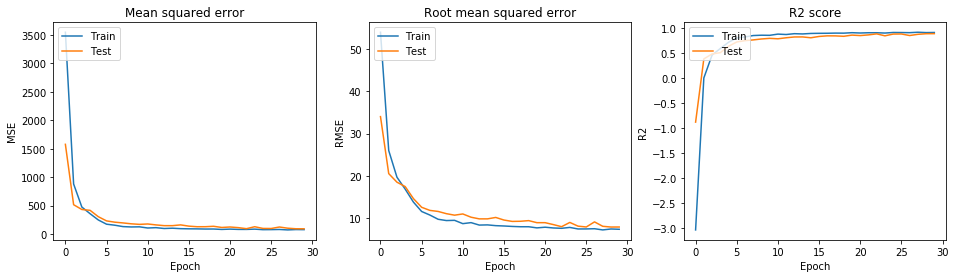

In [88]:
plot_metrics(history, "b0f2_metrics")

Observa-se que o modelo já saturou com menos de 10 épocas e não houve overfitting observando a curva de erro.

In [89]:
metrics = model.evaluate(X_val_b0_f2, y_val_b0_f2)

165/165 [==============================] - 0s 79us/step


In [90]:
print("Mean squared error (MSE):", metrics[0])
print("Root mean squared error (RMSE):", metrics[1])
print("R square (R^2):", metrics[2])

Mean squared error (MSE): 93.89695362900243
Root mean squared error (RMSE): 7.861228437134714
R square (R^2): 0.8860720616398435


Com os valores das métricas, observa-se que o score R2 foi bom com 0.886 sendo que o melhor valor possível é de 1.

Fazendo a predição do conjunto de validação utilizando o modelo treinado.

In [91]:
y_pred = model.predict(X_val_b0_f2)

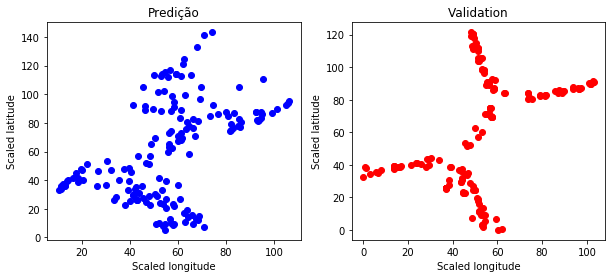

In [92]:
plot_pred(y_pred, y_val_b0_f2, "b0f2_pred")

Pelo plot podemos ver que a forma do prédio se manteu apesar de que bem deformado e com alguns valores fugindo bastante, principalmente os de latitude no eixo y.

### CNN

Preparando o conjunto de dados para ser utilizado pela rede convolucional

In [45]:
X_train_b0_f2_img, X_val_b0_f2_img, X_train_b0_f2, X_val_b0_f2 = CNN_reshape(X_train_b0_f2, X_val_b0_f2)

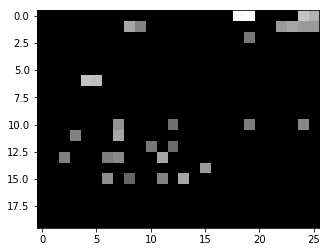

In [46]:
plt.imshow(1- X_train_b0_f2_img[6],cmap=plt.cm.binary)
plt.savefig('images/2d_b0f2.png', bbox_inches='tight',dpi=300)
plt.show()

Imagem 2D representando a RSSI de todos os WAP.

### Modelo 1

2 camadas convolucionais com 64 e 128 filtros respectivamente, dropout 0.5, 1 camada densa de 300 unidades, dropout 0.5

In [47]:
model, history = CNN1(building=0,
                     floor=2,
                     X_train=X_train_b0_f2,
                     y_train=y_train_b0_f2,
                     X_val=X_val_b0_f2,
                     y_val=y_val_b0_f2,
                     conv_filters=128,
                     conv_layers=2,
                     kernel_size=(2,2),
                     dense_units=300,
                     dense_layers=1,
                     maxpooling=True,
                     dropout=True,
                     dropout_pct=0.5,
                     epoch=70,
                     rate=0.001)

CNN-Building0-Floor2-ConvLayers2-ConvUnits128-lr0.001-DenseLayer1-DenseUnits300-MaxPool-True-Dropout0.5-1543873846
Train on 1443 samples, validate on 165 samples
Epoch 1/70
1443/1443 [==============================] - 1s 526us/step - loss: 2762.0191 - rmse: 46.4411 - r_square: -2.1325 - val_loss: 1332.0324 - val_rmse: 31.8340 - val_r_square: -0.6014
Epoch 2/70
1443/1443 [==============================] - 0s 300us/step - loss: 854.3038 - rmse: 26.3016 - r_square: 0.0330 - val_loss: 666.8231 - val_rmse: 23.7068 - val_r_square: 0.2090
Epoch 3/70
1443/1443 [==============================] - 0s 300us/step - loss: 546.1219 - rmse: 20.9830 - r_square: 0.3763 - val_loss: 417.3816 - val_rmse: 17.9023 - val_r_square: 0.5053
Epoch 4/70
1443/1443 [==============================] - 0s 299us/step - loss: 283.5328 - rmse: 14.6188 - r_square: 0.6788 - val_loss: 252.1484 - val_rmse: 13.6954 - val_r_square: 0.6947
Epoch 5/70
1443/1443 [==============================] - 0s 298us/step - loss: 232.7690 - r

Epoch 45/70
1443/1443 [==============================] - 0s 319us/step - loss: 71.4424 - rmse: 7.1651 - r_square: 0.9191 - val_loss: 77.6527 - val_rmse: 7.3357 - val_r_square: 0.9043
Epoch 46/70
1443/1443 [==============================] - 0s 319us/step - loss: 76.2359 - rmse: 7.3502 - r_square: 0.9121 - val_loss: 74.8694 - val_rmse: 7.1382 - val_r_square: 0.9085
Epoch 47/70
1443/1443 [==============================] - 0s 330us/step - loss: 68.3006 - rmse: 7.0164 - r_square: 0.9219 - val_loss: 79.3270 - val_rmse: 7.4277 - val_r_square: 0.9030
Epoch 48/70
1443/1443 [==============================] - 0s 310us/step - loss: 66.8436 - rmse: 6.9387 - r_square: 0.9241 - val_loss: 72.5901 - val_rmse: 7.0481 - val_r_square: 0.9111
Epoch 49/70
1443/1443 [==============================] - 0s 305us/step - loss: 71.3991 - rmse: 7.1617 - r_square: 0.9186 - val_loss: 75.2804 - val_rmse: 7.2566 - val_r_square: 0.9078
Epoch 50/70
1443/1443 [==============================] - 0s 312us/step - loss: 68.212

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 20, 26, 64)        640       
_________________________________________________________________
activation_9 (Activation)    (None, 20, 26, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 26, 128)       32896     
_________________________________________________________________
activation_10 (Activation)   (None, 20, 26, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 13, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 13, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16640)             0         
__________

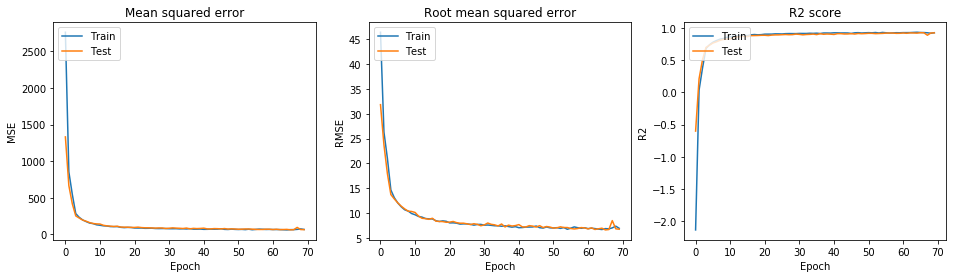

In [49]:
plot_metrics(history, "cnn1_b0f2_metrics")

In [50]:
metrics = model.evaluate(X_val_b0_f2, y_val_b0_f2)

165/165 [==============================] - 0s 212us/step


In [51]:
print("Mean squared error (MSE):", metrics[0])
print("Root mean squared error (RMSE):", metrics[1])
print("R square (R^2):", metrics[2])

Mean squared error (MSE): 64.75600656451601
Root mean squared error (RMSE): 6.7085701927994235
R square (R^2): 0.9198031620545821


Utilizando a rede convolucional houve uma melhora no desempenho para esse conjunto de dados. Havendo uma melhora em todos as métricas.

In [52]:
y_pred = model.predict(X_val_b0_f2)

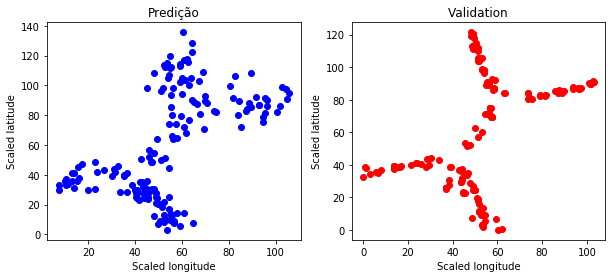

In [53]:
plot_pred(y_pred, y_val_b0_f2, "cnn1_b0f2_pred")

Comparando essa predição com a da rede neural os mesmos problemas no eixo y apareceram, porém de forma menor o que contribuíu para o melhor score.

### Modelo 2

4 camadas convolucionais (2 primeiras com 64 filtros e outras 2 com 128), dropout 0.5 e 2 camada densa com 128 unidades, dropout 0.5 

In [57]:
model, history = CNN2(building=0,
                     floor=2,
                     X_train=X_train_b0_f2,
                     y_train=y_train_b0_f2,
                     X_val=X_val_b0_f2,
                     y_val=y_val_b0_f2,
                     conv_filters1=64,
                     conv_filters2=128,
                     conv_layers1=2,
                     conv_layers2=2,
                     kernel_size=(2,2),
                     dense_units=128,
                     dense_layers=2,
                     maxpooling=True,
                     pool=(2,2),
                     dropout_pct=0.5,
                     epoch=70,
                     rate=0.01)

CNN-Building0-Floor2-ConvL12-ConvL22-ConvF164-ConvF2128-lr0.01-DenseLayer2-DenseUnits128-MaxPool-True-(2, 2)-Dropout0.5-1543875156
Train on 1443 samples, validate on 165 samples
Epoch 1/70
1443/1443 [==============================] - 1s 793us/step - loss: 4641.3990 - rmse: 60.7535 - r_square: -4.3407 - val_loss: 1523.7151 - val_rmse: 33.0499 - val_r_square: -0.8105
Epoch 2/70
1443/1443 [==============================] - 1s 472us/step - loss: 1337.7778 - rmse: 32.5955 - r_square: -0.5249 - val_loss: 838.8755 - val_rmse: 27.1360 - val_r_square: 0.0035
Epoch 3/70
1443/1443 [==============================] - 1s 474us/step - loss: 1096.2854 - rmse: 30.0526 - r_square: -0.2486 - val_loss: 937.7832 - val_rmse: 27.8304 - val_r_square: -0.1072
Epoch 4/70
1443/1443 [==============================] - 1s 477us/step - loss: 1038.4577 - rmse: 29.3050 - r_square: -0.1913 - val_loss: 834.9955 - val_rmse: 27.0565 - val_r_square: 0.0071
Epoch 5/70
1443/1443 [==============================] - 1s 476us/st

1443/1443 [==============================] - 1s 476us/step - loss: 166.6931 - rmse: 10.9430 - r_square: 0.8098 - val_loss: 79.0748 - val_rmse: 7.7355 - val_r_square: 0.9050
Epoch 45/70
1443/1443 [==============================] - 1s 482us/step - loss: 154.2970 - rmse: 10.4325 - r_square: 0.8237 - val_loss: 72.4459 - val_rmse: 7.2457 - val_r_square: 0.9118
Epoch 46/70
1443/1443 [==============================] - 1s 473us/step - loss: 162.6298 - rmse: 10.8174 - r_square: 0.8144 - val_loss: 79.0524 - val_rmse: 7.6379 - val_r_square: 0.9044
Epoch 47/70
1443/1443 [==============================] - 1s 472us/step - loss: 152.6850 - rmse: 10.3342 - r_square: 0.8259 - val_loss: 67.9981 - val_rmse: 7.0912 - val_r_square: 0.9177
Epoch 48/70
1443/1443 [==============================] - 1s 474us/step - loss: 158.0787 - rmse: 10.5992 - r_square: 0.8203 - val_loss: 64.4366 - val_rmse: 6.9060 - val_r_square: 0.9222
Epoch 49/70
1443/1443 [==============================] - 1s 474us/step - loss: 148.9599

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 20, 26, 64)        320       
_________________________________________________________________
activation_27 (Activation)   (None, 20, 26, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 20, 26, 64)        16448     
_________________________________________________________________
activation_28 (Activation)   (None, 20, 26, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 20, 26, 128)       32896     
_________________________________________________________________
activation_29 (Activation)   (None, 20, 26, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 20, 26, 128)       65664     
__________

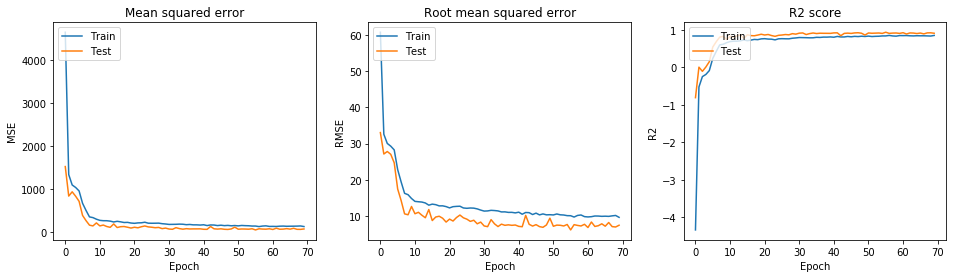

In [59]:
plot_metrics(history, "cnn2_b0f2_metrics")

A curva de teste sempre se apresentou abaixo do da de treinamento nos gráficos de erro e acima no gráfico de score R2 sendo um bom sinal.

In [60]:
metrics = model.evaluate(X_val_b0_f2, y_val_b0_f2)

165/165 [==============================] - 0s 326us/step


In [61]:
print("Mean squared error (MSE):", metrics[0])
print("Root mean squared error (RMSE):", metrics[1])
print("R square (R^2):", metrics[2])

Mean squared error (MSE): 75.34799790815873
Root mean squared error (RMSE): 7.476059358770197
R square (R^2): 0.9021585673996897


Adicionando mais camadas convolucionais e diminuindo as unidades das camadas densas resultou num desempenho parecido.

In [62]:
y_pred = model.predict(X_val_b0_f2)

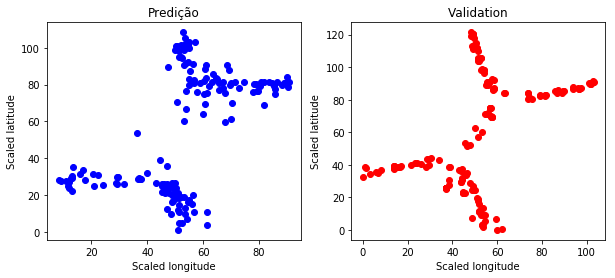

In [63]:
plot_pred(y_pred, y_val_b0_f2, "cnn2_b0f2_pred")

A forma das predições se apresenta levemente melhor do que com o modelo 1.

## Building 1 Floor 1 

Criando o dataset normalizado para o primeiro andar do prédio 1

In [64]:
dataset = set_train_val(df_train_b1_f1, df_val_b1_f1)

X_train_b1_f1 = dataset["X_train"]
X_val_b1_f1 = dataset["X_val"]

y_train_b1_f1 = dataset["y_train"]
y_val_b1_f1 = dataset["y_val"]

Imagem dos 3 prédios na ordem: prédio 0, prédio 1, prédio 2.

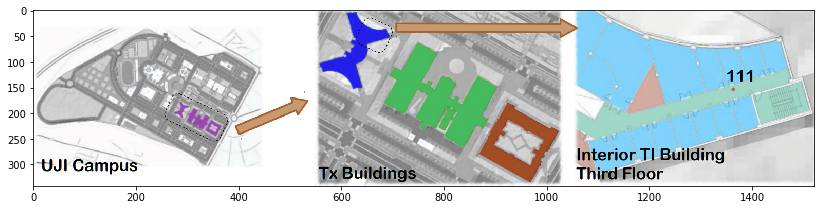

In [65]:
img = cv2.imread('data/UJIndoorLoc/UjiBuildings.PNG')
plt.figure(figsize=(14,10))
plt.imshow(img)
plt.show()

Plotando os valores das coordenadas de treinamento e validação

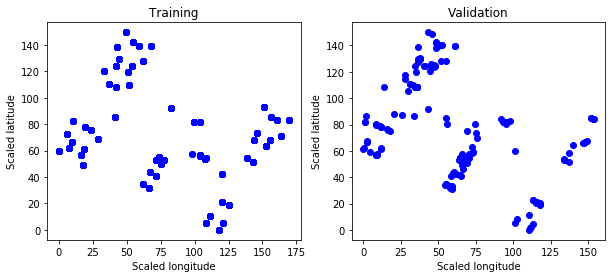

In [66]:
f, ax = plt.subplots(1, 2,figsize=(10,4))

ax[0].plot(y_train_b1_f1[:,0], y_train_b1_f1[:,1] , 'bo')
ax[0].set_title("Training")
ax[0].set_xlabel("Scaled longitude")
ax[0].set_ylabel("Scaled latitude")

ax[1].plot(y_val_b1_f1[:,0], y_val_b1_f1[:,1] , 'bo')
ax[1].set_title("Validation")
ax[1].set_xlabel("Scaled longitude")
ax[1].set_ylabel("Scaled latitude")

plt.savefig('images/b1f1.png', bbox_inches='tight',dpi=300)
plt.show()

Observa-se como a forma representa muito bem o prédio 1 do campus, visto na figura no meio de verde.

### Comparison between K-NN, SVM and RandomForest

In [39]:
compare_regression_methods(X_train_b1_f1, X_val_b1_f1, y_train_b1_f1, y_val_b1_f1)

Support Vector Regression

Mean absolute error (MAE):      19.623329
Mean squared error (MSE):       625.879202
Root mean squared error (RMSE): 25.017578
R square (R^2):                 0.587972

Grid Search

Mean absolute error (MAE):      10.210187
Mean squared error (MSE):       169.731920
Root mean squared error (RMSE): 13.028120
R square (R^2):                 0.889498
Params selected:  {'estimator__C': 10, 'estimator__gamma': 0.1, 'estimator__kernel': 'rbf'}

Random Forest Regressor

Mean absolute error (MAE):      14.179654
Mean squared error (MSE):       460.172106
Root mean squared error (RMSE): 21.451622
R square (R^2):                 0.700690

Grid Search

Mean absolute error (MAE):      12.746986
Mean squared error (MSE):       342.577732
Root mean squared error (RMSE): 18.508856
R square (R^2):                 0.779875
Params selected:  {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 15}

K-Neare

### Deep Neural Network

Treinamento com uma rede neural profunda com 3 camadas de 500 unidades, com uma camada de dropout logo após de cada uma para evitar overfitting.

In [135]:
model, history = DNN(building=1, floor=1,
                     X_train = X_train_b1_f1,
                     y_train = y_train_b1_f1, 
                     X_val = X_val_b1_f1,
                     y_val = y_val_b1_f1,
                     units=500, 
                     layers=3, 
                     dropout=0.5, 
                     epoch=30,
                     rate=0.001)

DNN-Building1-Floor1-DNN-units500-layers3-dropout0.5-epoch30-lr0.001-1543863113
Train on 1484 samples, validate on 143 samples
Epoch 1/30
1484/1484 [==============================] - 1s 358us/step - loss: 6706.2681 - rmse: 77.0663 - r_square: -2.4600 - val_loss: 3099.7553 - val_rmse: 51.1191 - val_r_square: -0.9388
Epoch 2/30
1484/1484 [==============================] - 0s 79us/step - loss: 2383.4674 - rmse: 44.0326 - r_square: -0.2242 - val_loss: 1562.0109 - val_rmse: 37.2258 - val_r_square: 0.0085
Epoch 3/30
1484/1484 [==============================] - 0s 72us/step - loss: 1192.5227 - rmse: 30.1801 - r_square: 0.3848 - val_loss: 817.5817 - val_rmse: 26.0454 - val_r_square: 0.4743
Epoch 4/30
1484/1484 [==============================] - 0s 67us/step - loss: 572.2786 - rmse: 19.5558 - r_square: 0.7051 - val_loss: 557.3772 - val_rmse: 20.5456 - val_r_square: 0.6396
Epoch 5/30
1484/1484 [==============================] - 0s 71us/step - loss: 427.9179 - rmse: 17.0741 - r_square: 0.7793 - v

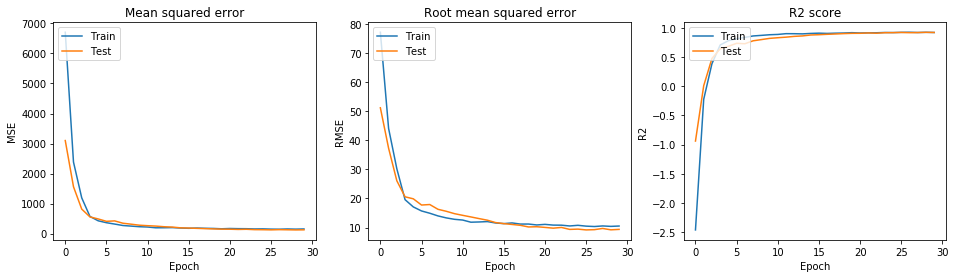

In [136]:
plot_metrics(history, "b1f1_metrics")

In [137]:
metrics = model.evaluate(X_val_b1_f1, y_val_b1_f1)

143/143 [==============================] - 0s 63us/step


In [138]:
print("Mean squared error (MSE):", metrics[0])
print("Root mean squared error (RMSE):", metrics[1])
print("R square (R^2):", metrics[2])

Mean squared error (MSE): 127.45257077517209
Root mean squared error (RMSE): 9.355230024644545
R square (R^2): 0.9183445072674251


Resultado muito bom de 0.918 no score R2.

In [139]:
y_pred = model.predict(X_val_b1_f1)

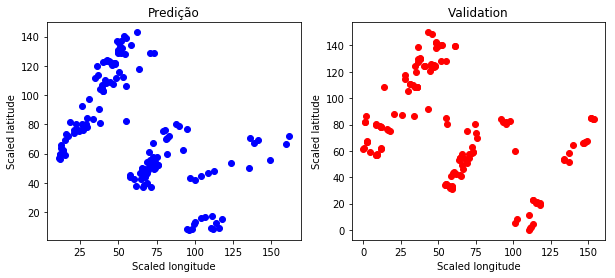

In [140]:
plot_pred(y_pred, y_val_b1_f1, "b1f1_pred")

Confirma-se a boa predição prevista pelo valor de score R2.

### CNN

Preparando o conjunto de dados para ser utilizado pela rede convolucional

In [67]:
X_train_b1_f1_img, X_val_b1_f1_img, X_train_b1_f1, X_val_b1_f1 = CNN_reshape(X_train_b1_f1, X_val_b1_f1)

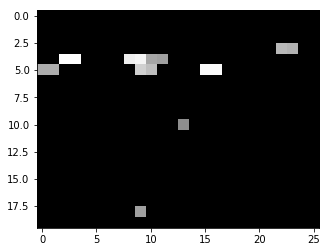

In [68]:
plt.imshow(1- X_train_b1_f1_img[6],cmap=plt.cm.binary)
plt.savefig('images/2d_b1f1.png', bbox_inches='tight',dpi=300)
plt.show()

Imagem 2D representando a RSSI de todos os WAP.

### Modelo 1

2 camadas convolucionais com 64 e 128 filtros respectivamente, dropout 0.5, 2 camada densa de 300 unidades, dropout 0.5

In [69]:
model, history = CNN1(building=1,
                     floor=1,
                     X_train=X_train_b1_f1,
                     y_train=y_train_b1_f1,
                     X_val=X_val_b1_f1,
                     y_val=y_val_b1_f1,
                     conv_filters=128,
                     conv_layers=2,
                     kernel_size=(2,2),
                     dense_units=300,
                     dense_layers=2,
                     maxpooling=True,
                     dropout=True,
                     dropout_pct=0.5,
                     epoch=70,
                     rate=0.001)

CNN-Building1-Floor1-ConvLayers2-ConvUnits128-lr0.001-DenseLayer2-DenseUnits300-MaxPool-True-Dropout0.5-1543875295
Train on 1484 samples, validate on 143 samples
Epoch 1/70
1484/1484 [==============================] - 1s 611us/step - loss: 5119.2833 - rmse: 65.6339 - r_square: -1.6289 - val_loss: 1760.6787 - val_rmse: 39.3319 - val_r_square: -0.1231
Epoch 2/70
1484/1484 [==============================] - 0s 307us/step - loss: 2217.0388 - rmse: 43.2950 - r_square: -0.1432 - val_loss: 1419.8664 - val_rmse: 35.2768 - val_r_square: 0.0962
Epoch 3/70
1484/1484 [==============================] - 0s 303us/step - loss: 1574.2761 - rmse: 36.0396 - r_square: 0.1880 - val_loss: 828.3714 - val_rmse: 25.8616 - val_r_square: 0.4795
Epoch 4/70
1484/1484 [==============================] - 0s 307us/step - loss: 968.9611 - rmse: 26.5672 - r_square: 0.5001 - val_loss: 461.7541 - val_rmse: 16.9812 - val_r_square: 0.7152
Epoch 5/70
1484/1484 [==============================] - 0s 304us/step - loss: 660.9014

Epoch 44/70
1484/1484 [==============================] - 0s 303us/step - loss: 202.6033 - rmse: 12.2506 - r_square: 0.8955 - val_loss: 176.3661 - val_rmse: 11.1945 - val_r_square: 0.8840
Epoch 45/70
1484/1484 [==============================] - 0s 309us/step - loss: 191.3319 - rmse: 11.7961 - r_square: 0.9016 - val_loss: 182.7038 - val_rmse: 11.3625 - val_r_square: 0.8790
Epoch 46/70
1484/1484 [==============================] - 0s 321us/step - loss: 189.5533 - rmse: 11.7160 - r_square: 0.9021 - val_loss: 161.5579 - val_rmse: 10.6111 - val_r_square: 0.8948
Epoch 47/70
1484/1484 [==============================] - 0s 305us/step - loss: 209.0989 - rmse: 12.2295 - r_square: 0.8921 - val_loss: 219.9910 - val_rmse: 12.3774 - val_r_square: 0.8534
Epoch 48/70
1484/1484 [==============================] - 0s 309us/step - loss: 196.6001 - rmse: 11.9946 - r_square: 0.8988 - val_loss: 168.6684 - val_rmse: 10.8694 - val_r_square: 0.8884
Epoch 49/70
1484/1484 [==============================] - 0s 308us

In [70]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 20, 26, 64)        640       
_________________________________________________________________
activation_32 (Activation)   (None, 20, 26, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 20, 26, 128)       32896     
_________________________________________________________________
activation_33 (Activation)   (None, 20, 26, 128)       0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 13, 128)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 10, 13, 128)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 16640)             0         
__________

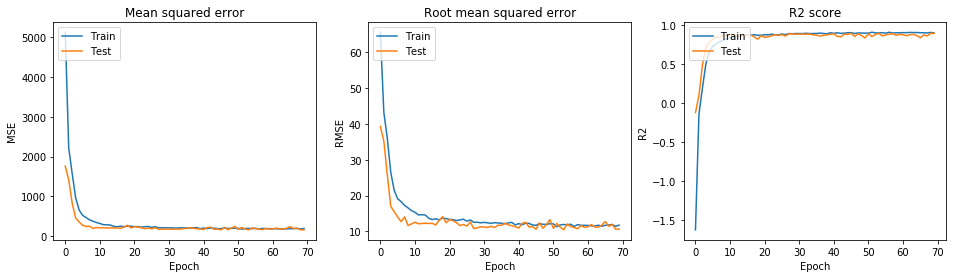

In [71]:
plot_metrics(history, "cnn1_b1f1_metrics")

In [72]:
metrics = model.evaluate(X_val_b1_f1, y_val_b1_f1)

143/143 [==============================] - 0s 188us/step


In [73]:
print("Mean squared error (MSE):", metrics[0])
print("Root mean squared error (RMSE):", metrics[1])
print("R square (R^2):", metrics[2])

Mean squared error (MSE): 161.3582403009588
Root mean squared error (RMSE): 10.65066697047307
R square (R^2): 0.8868947325052915


Nesse conjunto de dados a predição da CNN é pior do que a da DNN.

In [74]:
y_pred = model.predict(X_val_b1_f1)

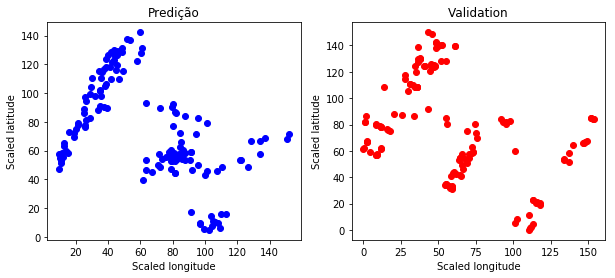

In [75]:
plot_pred(y_pred, y_val_b1_f1, "cnn1_b1f1_pred")

### Modelo 2

4 camadas convolucionais (2 primeiras com 64 filtros e outras 2 com 128), dropout 0.5 e 2 camada densa com 128 unidades, dropout 0.5

In [77]:
model, history = CNN2(building=1,
                     floor=1,
                     X_train=X_train_b1_f1,
                     y_train=y_train_b1_f1,
                     X_val=X_val_b1_f1,
                     y_val=y_val_b1_f1,
                     conv_filters1=64,
                     conv_filters2=128,
                     conv_layers1=2,
                     conv_layers2=2,
                     kernel_size=(2,2),
                     dense_units=128,
                     dense_layers=2,
                     maxpooling=True,
                     pool=(2,2),
                     dropout_pct=0.5,
                     epoch=70,
                     rate=0.01)

CNN-Building1-Floor1-ConvL12-ConvL22-ConvF164-ConvF2128-lr0.01-DenseLayer2-DenseUnits128-MaxPool-True-(2, 2)-Dropout0.5-1543875465
Train on 1484 samples, validate on 143 samples
Epoch 1/70
1484/1484 [==============================] - 1s 804us/step - loss: 14798.4589 - rmse: 96.8748 - r_square: -6.6512 - val_loss: 3652.1421 - val_rmse: 56.2762 - val_r_square: -1.3143
Epoch 2/70
1484/1484 [==============================] - 1s 471us/step - loss: 2709.7647 - rmse: 47.4453 - r_square: -0.3941 - val_loss: 1623.1476 - val_rmse: 37.9776 - val_r_square: -0.0348
Epoch 3/70
1484/1484 [==============================] - 1s 466us/step - loss: 2277.4399 - rmse: 44.4122 - r_square: -0.1742 - val_loss: 1524.6514 - val_rmse: 36.2420 - val_r_square: 0.0350
Epoch 4/70
1484/1484 [==============================] - 1s 469us/step - loss: 2191.0484 - rmse: 43.4873 - r_square: -0.1308 - val_loss: 1583.0348 - val_rmse: 36.4176 - val_r_square: 0.0013
Epoch 5/70
1484/1484 [==============================] - 1s 467u

Epoch 44/70
1484/1484 [==============================] - 1s 474us/step - loss: 279.8238 - rmse: 14.2092 - r_square: 0.8550 - val_loss: 198.2743 - val_rmse: 11.4731 - val_r_square: 0.8727
Epoch 45/70
1484/1484 [==============================] - 1s 477us/step - loss: 250.5535 - rmse: 13.6148 - r_square: 0.8706 - val_loss: 215.4739 - val_rmse: 12.4139 - val_r_square: 0.8613
Epoch 46/70
1484/1484 [==============================] - 1s 466us/step - loss: 263.1807 - rmse: 13.8848 - r_square: 0.8646 - val_loss: 171.3441 - val_rmse: 10.9679 - val_r_square: 0.8906
Epoch 47/70
1484/1484 [==============================] - 1s 471us/step - loss: 260.3882 - rmse: 13.6546 - r_square: 0.8654 - val_loss: 199.3620 - val_rmse: 11.7077 - val_r_square: 0.8713
Epoch 48/70
1484/1484 [==============================] - 1s 470us/step - loss: 262.9011 - rmse: 13.7086 - r_square: 0.8641 - val_loss: 210.4638 - val_rmse: 11.6770 - val_r_square: 0.8632
Epoch 49/70
1484/1484 [==============================] - 1s 469us

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 20, 26, 64)        320       
_________________________________________________________________
activation_41 (Activation)   (None, 20, 26, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 20, 26, 64)        16448     
_________________________________________________________________
activation_42 (Activation)   (None, 20, 26, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 20, 26, 128)       32896     
_________________________________________________________________
activation_43 (Activation)   (None, 20, 26, 128)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 20, 26, 128)       65664     
__________

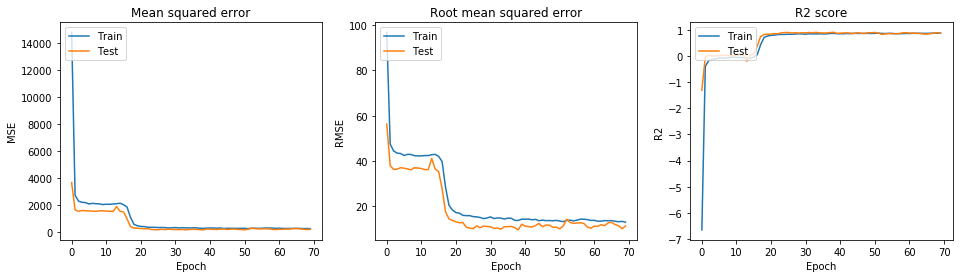

In [79]:
plot_metrics(history, "cnn2_b1f1_metrics")

Nos gráficos pode se observar como o modelo ficou preso num mínimo local por várias épocas até conseguir convergir. Um ajuste na taxa de aprendizado poderia ajudar a corrigir porém deixei desse jeito para demonstrar.

In [80]:
metrics = model.evaluate(X_val_b1_f1, y_val_b1_f1)

143/143 [==============================] - 0s 318us/step


In [81]:
print("Mean squared error (MSE):", metrics[0])
print("Root mean squared error (RMSE):", metrics[1])
print("R square (R^2):", metrics[2])

Mean squared error (MSE): 196.0894688959722
Root mean squared error (RMSE): 11.28867628857806
R square (R^2): 0.8636170750731355


Adicionando mais camadas convolucionais houve uma piora. Esse resultado pode ter sido causado devido ao não alinhamento correto dos WAP quando é feito o reshape para 2D do conjunto de dados. Causando dificuldade para a CNN achar padrões na imagem.

In [82]:
y_pred = model.predict(X_val_b1_f1)

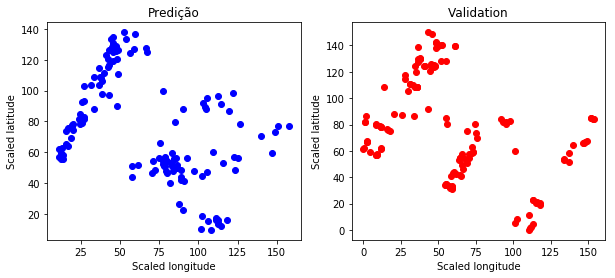

In [83]:
plot_pred(y_pred, y_val_b1_f1, "cnn2_b1f1_pred")

Grande dispersão dos dados no meio do gráfico para a direita.

## Building 2 Floor 1 

Criando o dataset normalizado para o primeiro andar do prédio 2

In [84]:
dataset = set_train_val(df_train_b2_f1, df_val_b2_f1)

X_train_b2_f1 = dataset["X_train"]
X_val_b2_f1 = dataset["X_val"]

y_train_b2_f1 = dataset["y_train"]
y_val_b2_f1 = dataset["y_val"]

Imagem dos 3 prédios na ordem: prédio 0, prédio 1, prédio 2.

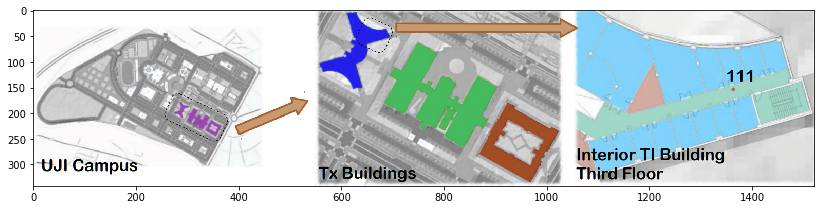

In [85]:
img = cv2.imread('data/UJIndoorLoc/UjiBuildings.PNG')
plt.figure(figsize=(14,10))
plt.imshow(img)
plt.show()

Plotando os valores das coordenadas de treinamento e validação

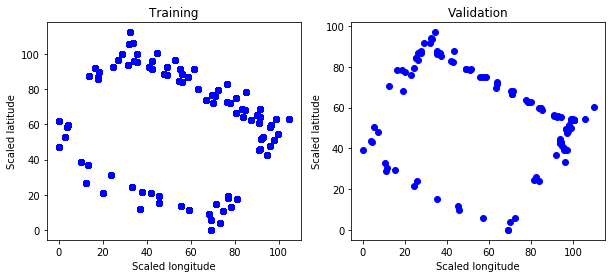

In [86]:
f, ax = plt.subplots(1, 2,figsize=(10,4))

ax[0].plot(y_train_b2_f1[:,0], y_train_b2_f1[:,1] , 'bo')
ax[0].set_title("Training")
ax[0].set_xlabel("Scaled longitude")
ax[0].set_ylabel("Scaled latitude")

ax[1].plot(y_val_b2_f1[:,0], y_val_b2_f1[:,1] , 'bo')
ax[1].set_title("Validation")
ax[1].set_xlabel("Scaled longitude")
ax[1].set_ylabel("Scaled latitude")

plt.savefig('images/b2f1.png', bbox_inches='tight',dpi=300)
plt.show()

Observa-se como a forma representa muito bem o prédio 2 do campus.

### Comparison between K-NN, SVM and RandomForest

In [41]:
compare_regression_methods(X_train_b2_f1, X_val_b2_f1, y_train_b2_f1, y_val_b2_f1)

Support Vector Regression

Mean absolute error (MAE):      15.081955
Mean squared error (MSE):       361.701036
Root mean squared error (RMSE): 19.018439
R square (R^2):                 0.525710

Grid Search

Mean absolute error (MAE):      13.005715
Mean squared error (MSE):       274.396968
Root mean squared error (RMSE): 16.564932
R square (R^2):                 0.632209
Params selected:  {'estimator__C': 10, 'estimator__gamma': 1, 'estimator__kernel': 'rbf'}

Random Forest Regressor

Mean absolute error (MAE):      10.706570
Mean squared error (MSE):       198.731918
Root mean squared error (RMSE): 14.097231
R square (R^2):                 0.724483

Grid Search

Mean absolute error (MAE):      10.645849
Mean squared error (MSE):       191.455676
Root mean squared error (RMSE): 13.836751
R square (R^2):                 0.728917
Params selected:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 40}

K-Nearest

### Deep Neural Network

Treinamento com uma rede neural profunda com 3 camadas de 500 unidades, com uma camada de dropout logo após de cada uma para evitar overfitting.

In [164]:
model, history = DNN(building=2, floor=1,
                     X_train = X_train_b2_f1,
                     y_train = y_train_b2_f1, 
                     X_val = X_val_b2_f1,
                     y_val = y_val_b2_f1,
                     units=500, 
                     layers=3, 
                     dropout=0.5, 
                     epoch=30,
                     rate=0.001)

DNN-Building2-Floor1-DNN-units500-layers3-dropout0.5-epoch30-lr0.001-1543863483
Train on 2162 samples, validate on 111 samples
Epoch 1/30
2162/2162 [==============================] - 1s 314us/step - loss: 3152.2247 - rmse: 52.2573 - r_square: -2.7949 - val_loss: 1144.1796 - val_rmse: 31.4654 - val_r_square: -0.4439
Epoch 2/30
2162/2162 [==============================] - 0s 77us/step - loss: 861.8445 - rmse: 27.0118 - r_square: -0.0483 - val_loss: 607.4284 - val_rmse: 22.6263 - val_r_square: 0.2340
Epoch 3/30
2162/2162 [==============================] - 0s 77us/step - loss: 425.1550 - rmse: 18.2356 - r_square: 0.4860 - val_loss: 310.8688 - val_rmse: 15.6766 - val_r_square: 0.6073
Epoch 4/30
2162/2162 [==============================] - 0s 75us/step - loss: 249.4020 - rmse: 13.8430 - r_square: 0.6984 - val_loss: 229.6290 - val_rmse: 12.9891 - val_r_square: 0.7098
Epoch 5/30
2162/2162 [==============================] - 0s 74us/step - loss: 204.7164 - rmse: 12.5104 - r_square: 0.7526 - val_

In [165]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 500)               260500    
_________________________________________________________________
activation_101 (Activation)  (None, 500)               0         
_________________________________________________________________
dropout_62 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_102 (Activation)  (None, 500)               0         
_________________________________________________________________
dropout_63 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 500)               250500    
__________

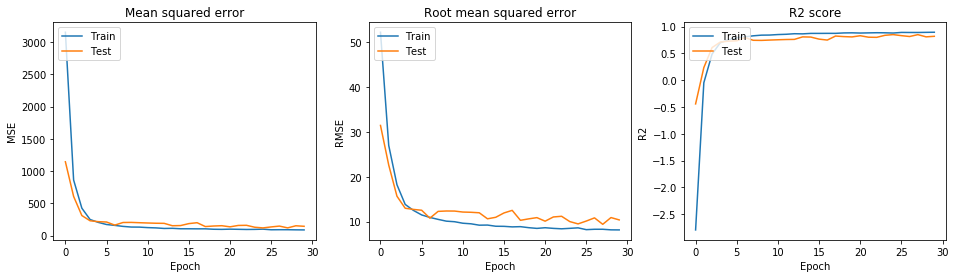

In [166]:
plot_metrics(history, "b2f1_metrics")

In [167]:
metrics = model.evaluate(X_val_b2_f1, y_val_b2_f1)

111/111 [==============================] - 0s 90us/step


In [168]:
print("Mean squared error (MSE):", metrics[0])
print("Root mean squared error (RMSE):", metrics[1])
print("R square (R^2):", metrics[2])

Mean squared error (MSE): 144.11546098863755
Root mean squared error (RMSE): 10.385967254638672
R square (R^2): 0.7816611415631062


In [169]:
y_pred = model.predict(X_val_b2_f1)

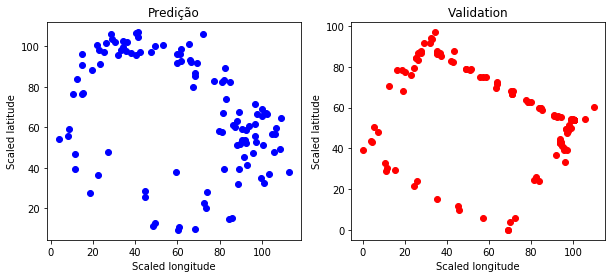

In [170]:
plot_pred(y_pred, y_val_b2_f1, "b2f1_pred")

Grande variância dos pontos em relação ao conjunto de validação, nota-se que o espalhamento foi parecido com o do conjunto de dados de treinamento.

### CNN

In [87]:
X_train_b2_f1_img, X_val_b2_f1_img, X_train_b2_f1, X_val_b2_f1 = CNN_reshape(X_train_b2_f1, X_val_b2_f1)

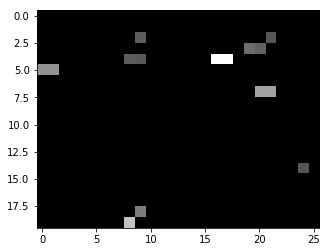

In [88]:
plt.imshow(1- X_train_b2_f1_img[6],cmap=plt.cm.binary)
plt.savefig('images/2d_b2f1.png', bbox_inches='tight',dpi=300)
plt.show()

### Modelo 1

2 camadas convolucionais com 64 e 128 filtros respectivamente, dropout 0.5, 2 camadas densas de 300 unidades, dropout 0.5

In [117]:
model, history = CNN1(building=2,
                     floor=1,
                     X_train=X_train_b2_f1,
                     y_train=y_train_b2_f1,
                     X_val=X_val_b2_f1,
                     y_val=y_val_b2_f1,
                     conv_filters=128,
                     conv_layers=2,
                     kernel_size=(2,2),
                     dense_units=300,
                     dense_layers=2,
                     maxpooling=True,
                     dropout=True,
                     dropout_pct=0.5,
                     epoch=70,
                     rate=0.001)

CNN-Building2-Floor1-ConvLayers2-ConvUnits128-lr0.001-DenseLayer2-DenseUnits300-MaxPool-True-Dropout0.5-1543876242
Train on 2162 samples, validate on 111 samples
Epoch 1/70
2162/2162 [==============================] - 1s 555us/step - loss: 2621.5921 - rmse: 46.5388 - r_square: -2.1672 - val_loss: 1113.3519 - val_rmse: 32.1863 - val_r_square: -0.4041
Epoch 2/70
2162/2162 [==============================] - 1s 309us/step - loss: 971.0892 - rmse: 29.0888 - r_square: -0.1766 - val_loss: 721.6952 - val_rmse: 24.8071 - val_r_square: 0.0893
Epoch 3/70
2162/2162 [==============================] - 1s 311us/step - loss: 734.3134 - rmse: 24.8842 - r_square: 0.1115 - val_loss: 399.9958 - val_rmse: 17.7699 - val_r_square: 0.4954
Epoch 4/70
2162/2162 [==============================] - 1s 311us/step - loss: 432.7029 - rmse: 18.6497 - r_square: 0.4754 - val_loss: 211.8215 - val_rmse: 12.8433 - val_r_square: 0.7325
Epoch 5/70
2162/2162 [==============================] - 1s 311us/step - loss: 327.4699 - 

2162/2162 [==============================] - 1s 311us/step - loss: 145.7403 - rmse: 10.3928 - r_square: 0.8226 - val_loss: 109.7831 - val_rmse: 9.2292 - val_r_square: 0.8612
Epoch 45/70
2162/2162 [==============================] - 1s 301us/step - loss: 142.9490 - rmse: 10.2615 - r_square: 0.8271 - val_loss: 105.6959 - val_rmse: 9.0973 - val_r_square: 0.8664
Epoch 46/70
2162/2162 [==============================] - 1s 301us/step - loss: 136.0956 - rmse: 10.1254 - r_square: 0.8353 - val_loss: 144.7207 - val_rmse: 10.7685 - val_r_square: 0.8170
Epoch 47/70
2162/2162 [==============================] - 1s 300us/step - loss: 136.5685 - rmse: 10.1710 - r_square: 0.8349 - val_loss: 101.4115 - val_rmse: 8.9804 - val_r_square: 0.8718
Epoch 48/70
2162/2162 [==============================] - 1s 301us/step - loss: 135.7408 - rmse: 10.0965 - r_square: 0.8363 - val_loss: 116.0356 - val_rmse: 9.6237 - val_r_square: 0.8533
Epoch 49/70
2162/2162 [==============================] - 1s 310us/step - loss: 12

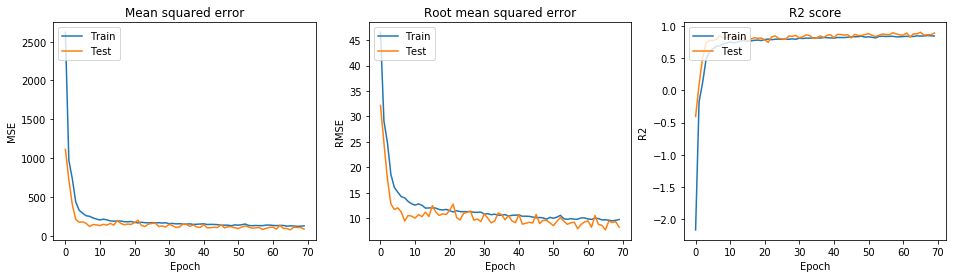

In [118]:
plot_metrics(history, "cnn1_b2f1_metrics")

In [119]:
metrics = model.evaluate(X_val_b2_f1, y_val_b2_f1)

111/111 [==============================] - 0s 216us/step


In [120]:
print("Mean squared error (MSE):", metrics[0])
print("Root mean squared error (RMSE):", metrics[1])
print("R square (R^2):", metrics[2])

Mean squared error (MSE): 85.18888387594137
Root mean squared error (RMSE): 8.27045201396083
R square (R^2): 0.8779691667170137


Resultados superiores ao da DNN.

In [121]:
y_pred = model.predict(X_val_b2_f1)

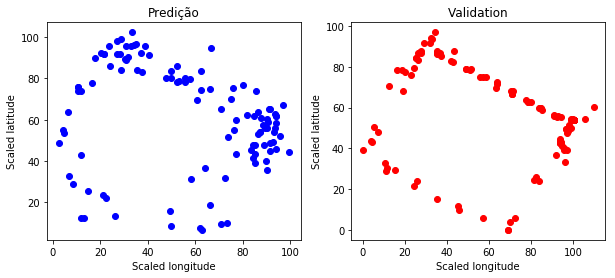

In [122]:
plot_pred(y_pred, y_val_b2_f1, "cnn1_b2f1_pred")

Ainda há uma dispersão comparando os pontos.

### Modelo 2

4 camadas convolucionais (2 primeiras com 64 filtros e outras 2 com 128), dropout 0.5 e 2 camada densa com 128 unidades, dropout 0.5

In [105]:
model, history = CNN2(building=2,
                     floor=1,
                     X_train=X_train_b2_f1,
                     y_train=y_train_b2_f1,
                     X_val=X_val_b2_f1,
                     y_val=y_val_b2_f1,
                     conv_filters1=64,
                     conv_filters2=128,
                     conv_layers1=2,
                     conv_layers2=2,
                     kernel_size=(2,2),
                     dense_units=128,
                     dense_layers=2,
                     maxpooling=True,
                     pool=(2,2),
                     dropout_pct=0.5,
                     epoch=70,
                     rate=0.001)

CNN-Building2-Floor1-ConvL12-ConvL22-ConvF164-ConvF2128-lr0.001-DenseLayer2-DenseUnits128-MaxPool-True-(2, 2)-Dropout0.5-1543876131
Train on 2162 samples, validate on 111 samples
Epoch 1/70
2162/2162 [==============================] - 2s 745us/step - loss: 2338.0656 - rmse: 44.1987 - r_square: -1.8265 - val_loss: 1072.6390 - val_rmse: 30.2333 - val_r_square: -0.3538
Epoch 2/70
2162/2162 [==============================] - 1s 468us/step - loss: 924.3365 - rmse: 28.1552 - r_square: -0.1154 - val_loss: 736.9935 - val_rmse: 25.3328 - val_r_square: 0.0705
Epoch 3/70
2162/2162 [==============================] - 1s 470us/step - loss: 654.6690 - rmse: 23.2406 - r_square: 0.2106 - val_loss: 337.0915 - val_rmse: 16.6546 - val_r_square: 0.5746
Epoch 4/70
2162/2162 [==============================] - 1s 469us/step - loss: 393.0876 - rmse: 17.7188 - r_square: 0.5247 - val_loss: 227.9084 - val_rmse: 13.7244 - val_r_square: 0.7124
Epoch 5/70
2162/2162 [==============================] - 1s 474us/step - 

Epoch 44/70
2162/2162 [==============================] - 1s 474us/step - loss: 159.6745 - rmse: 10.8560 - r_square: 0.8067 - val_loss: 114.5121 - val_rmse: 9.6542 - val_r_square: 0.8552
Epoch 45/70
2162/2162 [==============================] - 1s 472us/step - loss: 146.7962 - rmse: 10.5254 - r_square: 0.8224 - val_loss: 154.5916 - val_rmse: 11.3490 - val_r_square: 0.8046
Epoch 46/70
2162/2162 [==============================] - 1s 470us/step - loss: 150.3113 - rmse: 10.6084 - r_square: 0.8167 - val_loss: 125.5617 - val_rmse: 10.1195 - val_r_square: 0.8413
Epoch 47/70
2162/2162 [==============================] - 1s 475us/step - loss: 152.9440 - rmse: 10.6598 - r_square: 0.8140 - val_loss: 109.1386 - val_rmse: 9.4256 - val_r_square: 0.8621
Epoch 48/70
2162/2162 [==============================] - 1s 483us/step - loss: 153.7340 - rmse: 10.6790 - r_square: 0.8138 - val_loss: 98.0386 - val_rmse: 8.9370 - val_r_square: 0.8761
Epoch 49/70
2162/2162 [==============================] - 1s 475us/ste

In [111]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 20, 26, 64)        320       
_________________________________________________________________
activation_69 (Activation)   (None, 20, 26, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 20, 26, 64)        16448     
_________________________________________________________________
activation_70 (Activation)   (None, 20, 26, 64)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 20, 26, 128)       32896     
_________________________________________________________________
activation_71 (Activation)   (None, 20, 26, 128)       0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 20, 26, 128)       65664     
__________

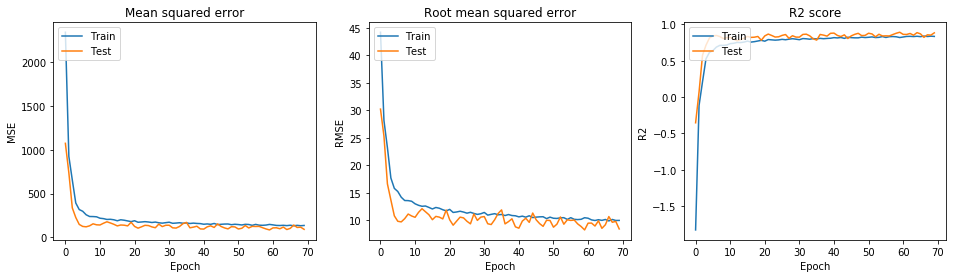

In [112]:
plot_metrics(history, "cnn2_b2f1_metrics")

In [113]:
metrics = model.evaluate(X_val_b2_f1, y_val_b2_f1)

111/111 [==============================] - 0s 238us/step


In [114]:
print("Mean squared error (MSE):", metrics[0])
print("Root mean squared error (RMSE):", metrics[1])
print("R square (R^2):", metrics[2])

Mean squared error (MSE): 92.98809656366572
Root mean squared error (RMSE): 8.46274232434797
R square (R^2): 0.8665388435930819


In [115]:
y_pred = model.predict(X_val_b2_f1)

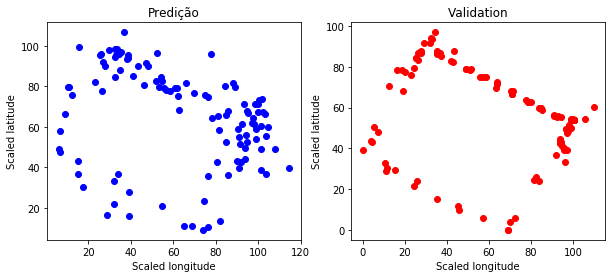

In [116]:
plot_pred(y_pred, y_val_b2_f1, "cnn2_b2f1_pred")

Mesmo problema do prédio 1 ocorreu aqui aparentemente, mas mesmo com o conjunto de dados bagunçado uma predição razoável pode ser feita.